# Comprehensive EDA

In [ ]:
## 1. Setup and Data Loading

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
!ls

README.md  final.ipynb	raw_data  venv


In [ ]:
##Data Loading

## Errors dataset
errors = pd.read_csv("./raw_data/PdM_errors.csv", parse_dates=['datetime'])

## Failures dataset
failures = pd.read_csv("./raw_data/PdM_failures.csv", parse_dates=['datetime'])

## Machines dataset
machines = pd.read_csv("./raw_data/PdM_machines.csv")

## Maintenance dataset
maintenance = pd.read_csv("./raw_data/PdM_maint.csv", parse_dates=['datetime'])

## Telemetry dataset
telemetry = pd.read_csv("./raw_data/PdM_telemetry.csv", parse_dates=['datetime'])

In [7]:
for name, df in {'Telemetry': telemetry, 'Maintenance': maintenance, 'Machines': machines, 'Failures': failures, 'Errors': errors}.items():
    print(f"\n{name} Dataset:")
    print(df.info())
    print(df.describe())
    print(f"Missing values:\n{df.isnull().sum()}\n")


Telemetry Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   876100 non-null  datetime64[ns]
 1   machineID  876100 non-null  int64         
 2   volt       876100 non-null  float64       
 3   rotate     876100 non-null  float64       
 4   pressure   876100 non-null  float64       
 5   vibration  876100 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 40.1 MB
None
                  datetime      machineID           volt         rotate  \
count               876100  876100.000000  876100.000000  876100.000000   
mean   2015-07-02 18:00:00      50.500000     170.777736     446.605119   
min    2015-01-01 06:00:00       1.000000      97.333604     138.432075   
25%    2015-04-02 12:00:00      25.750000     160.304927     412.305714   
50%    2015-07-02 18:00:00      50.5

## 2. Telemetry Data Analysis

### 2.1 Time Series Visualization

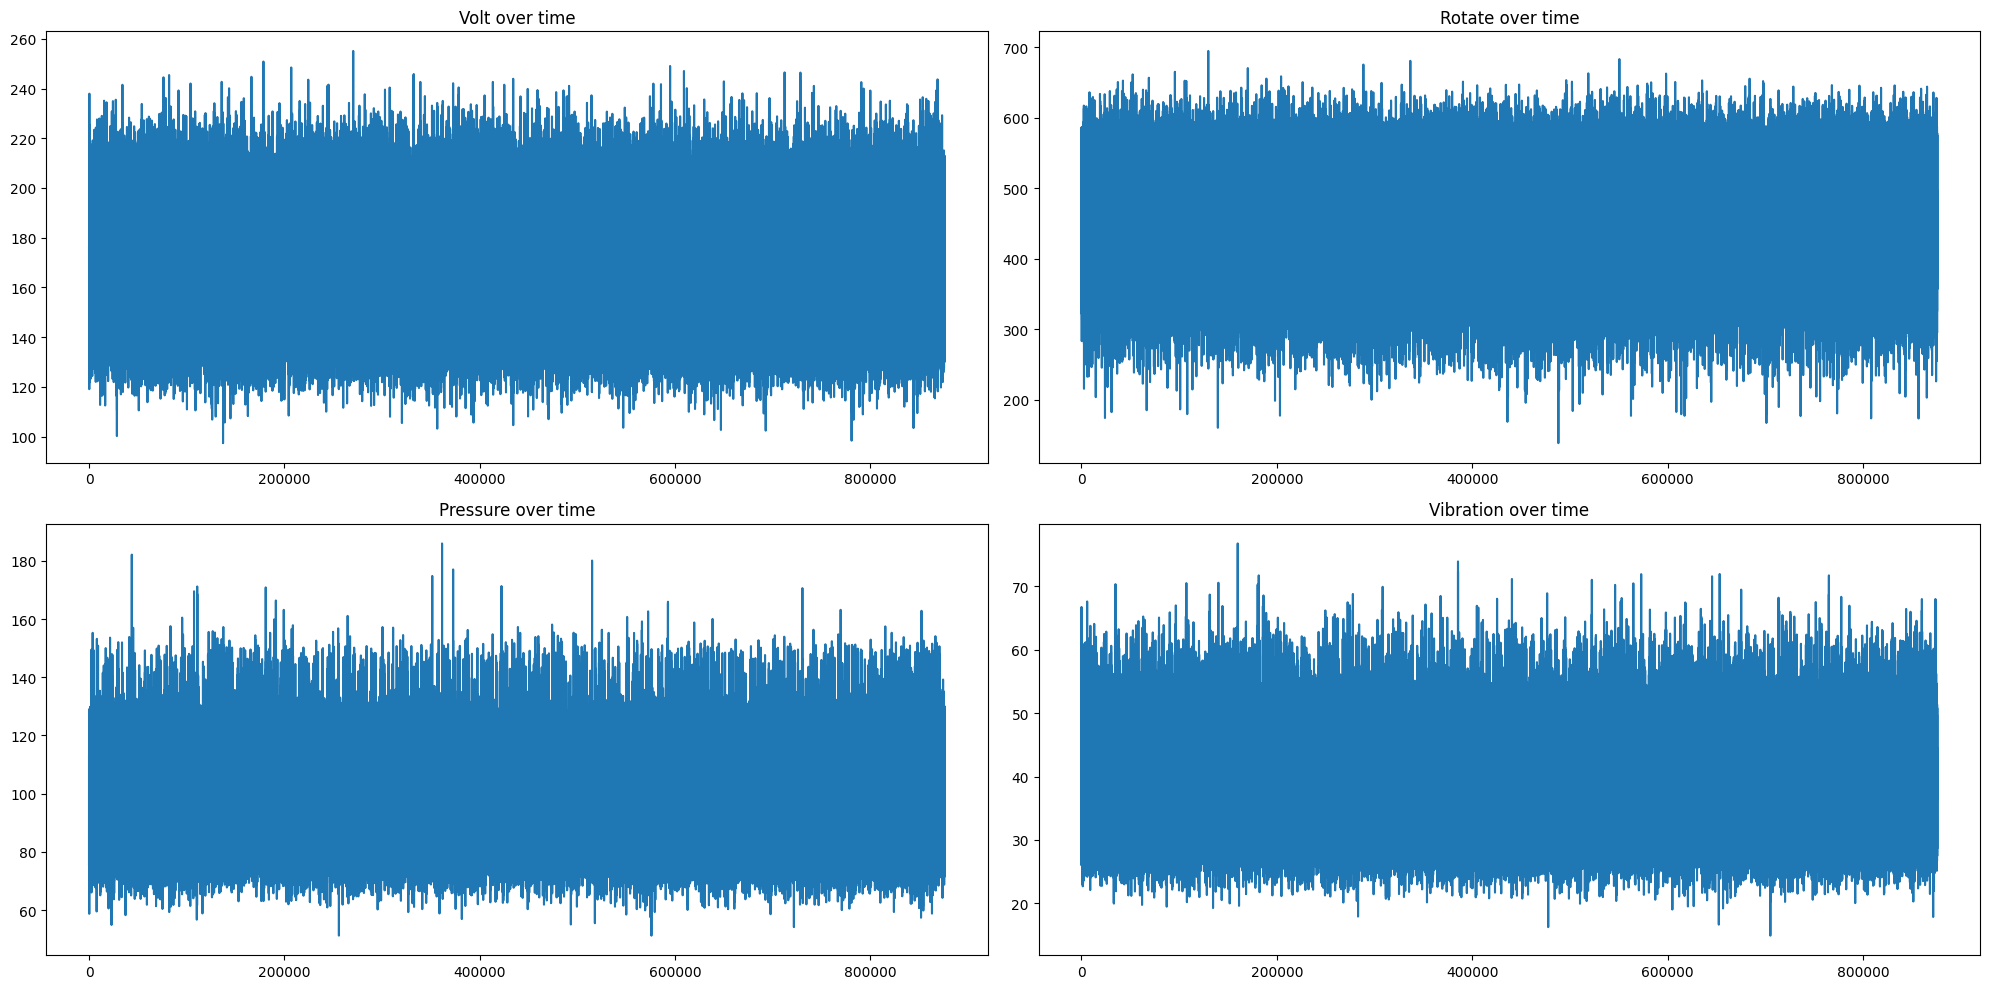

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, col in enumerate(['volt', 'rotate', 'pressure', 'vibration']):
    telemetry[col].plot(ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col.capitalize()} over time')
plt.tight_layout()
plt.show()

### 2.2 Seasonality and Trend Analysis

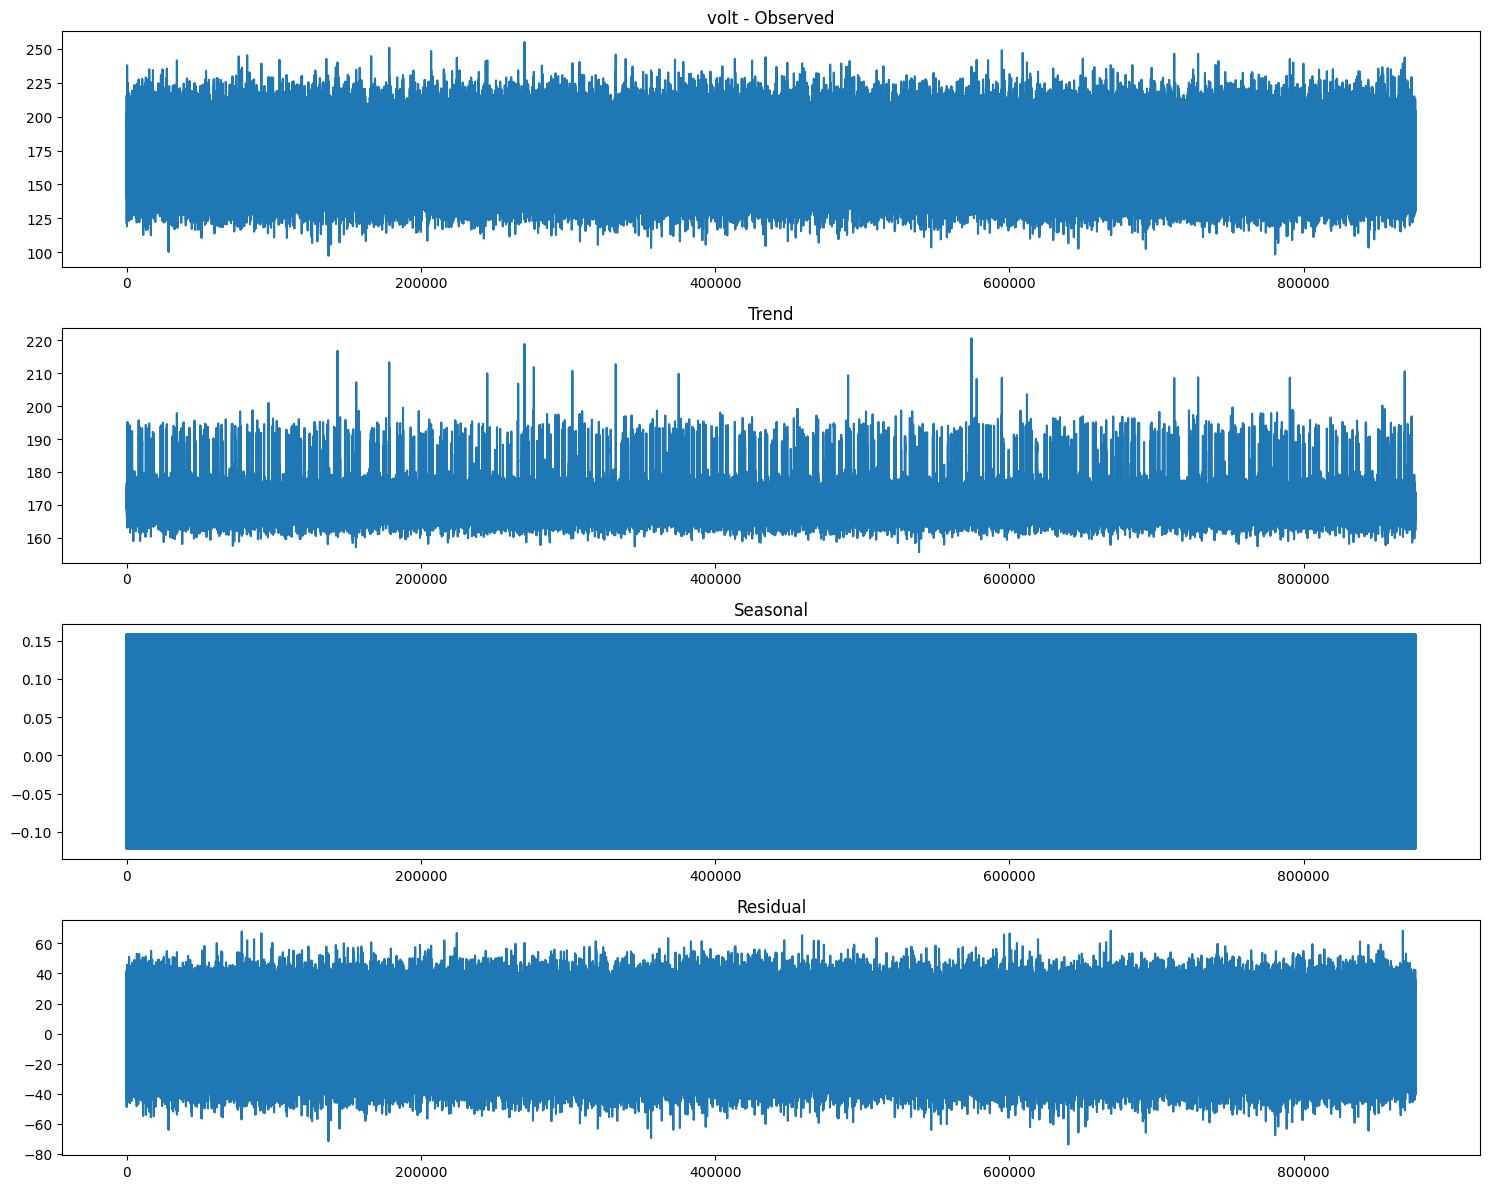

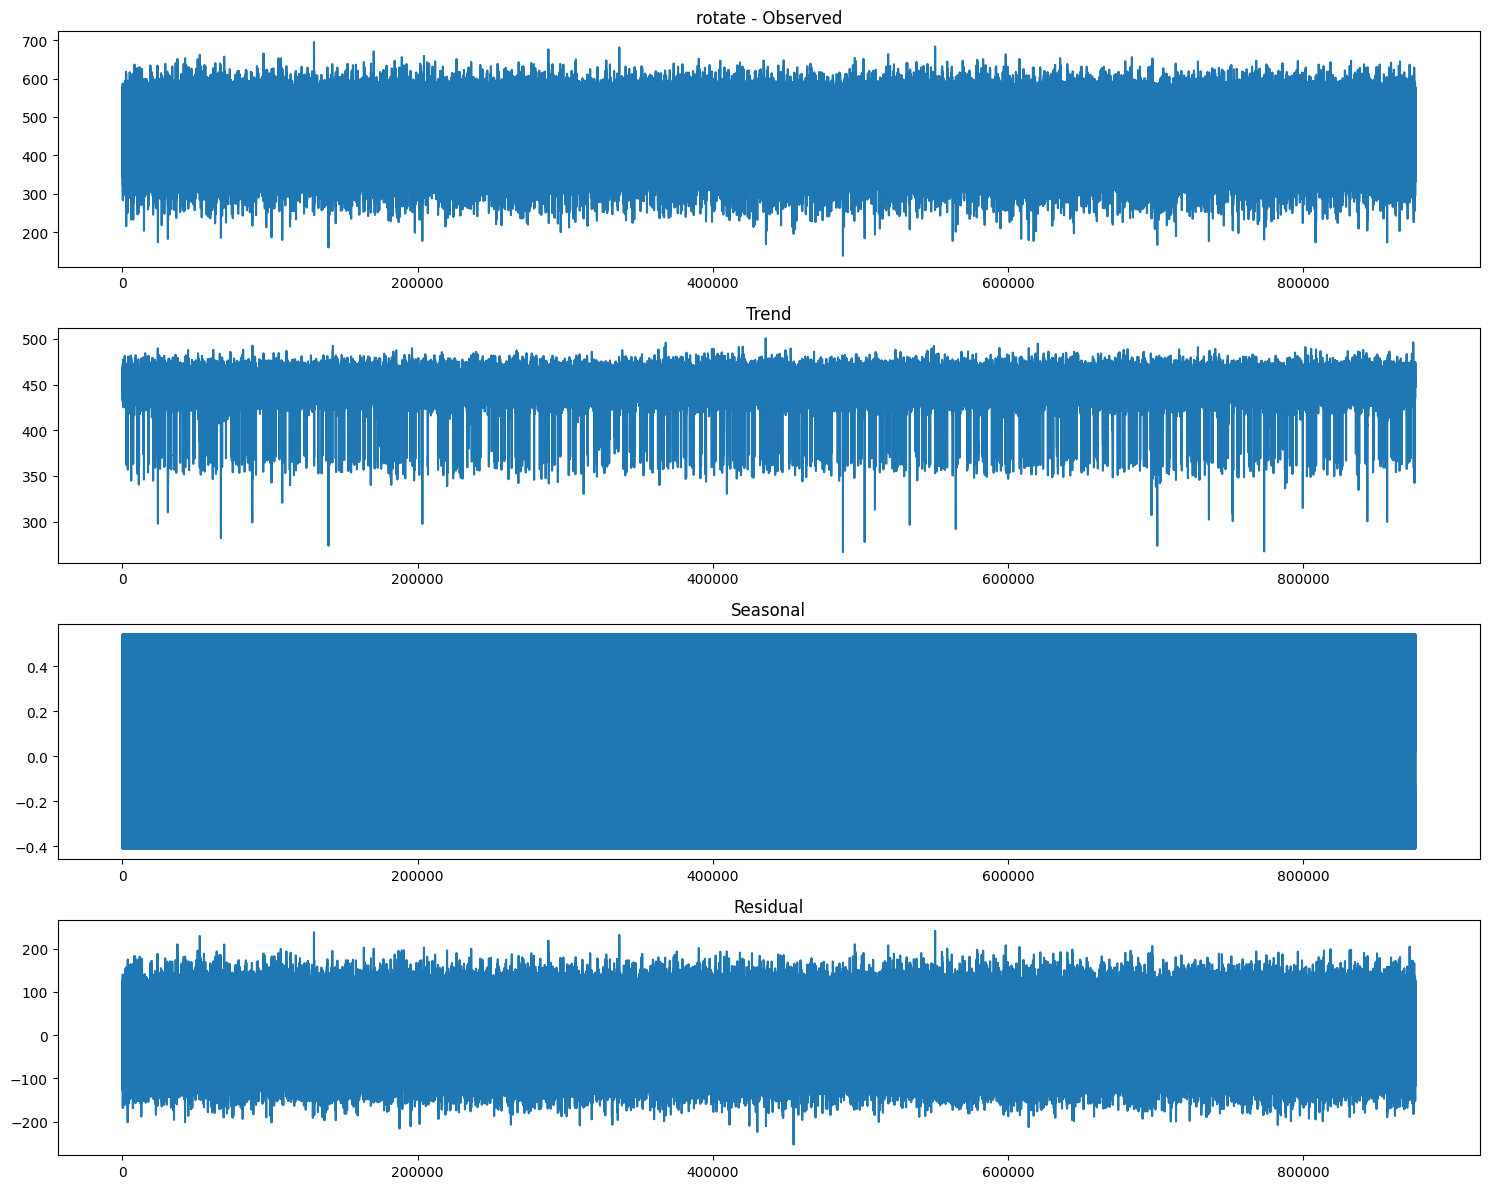

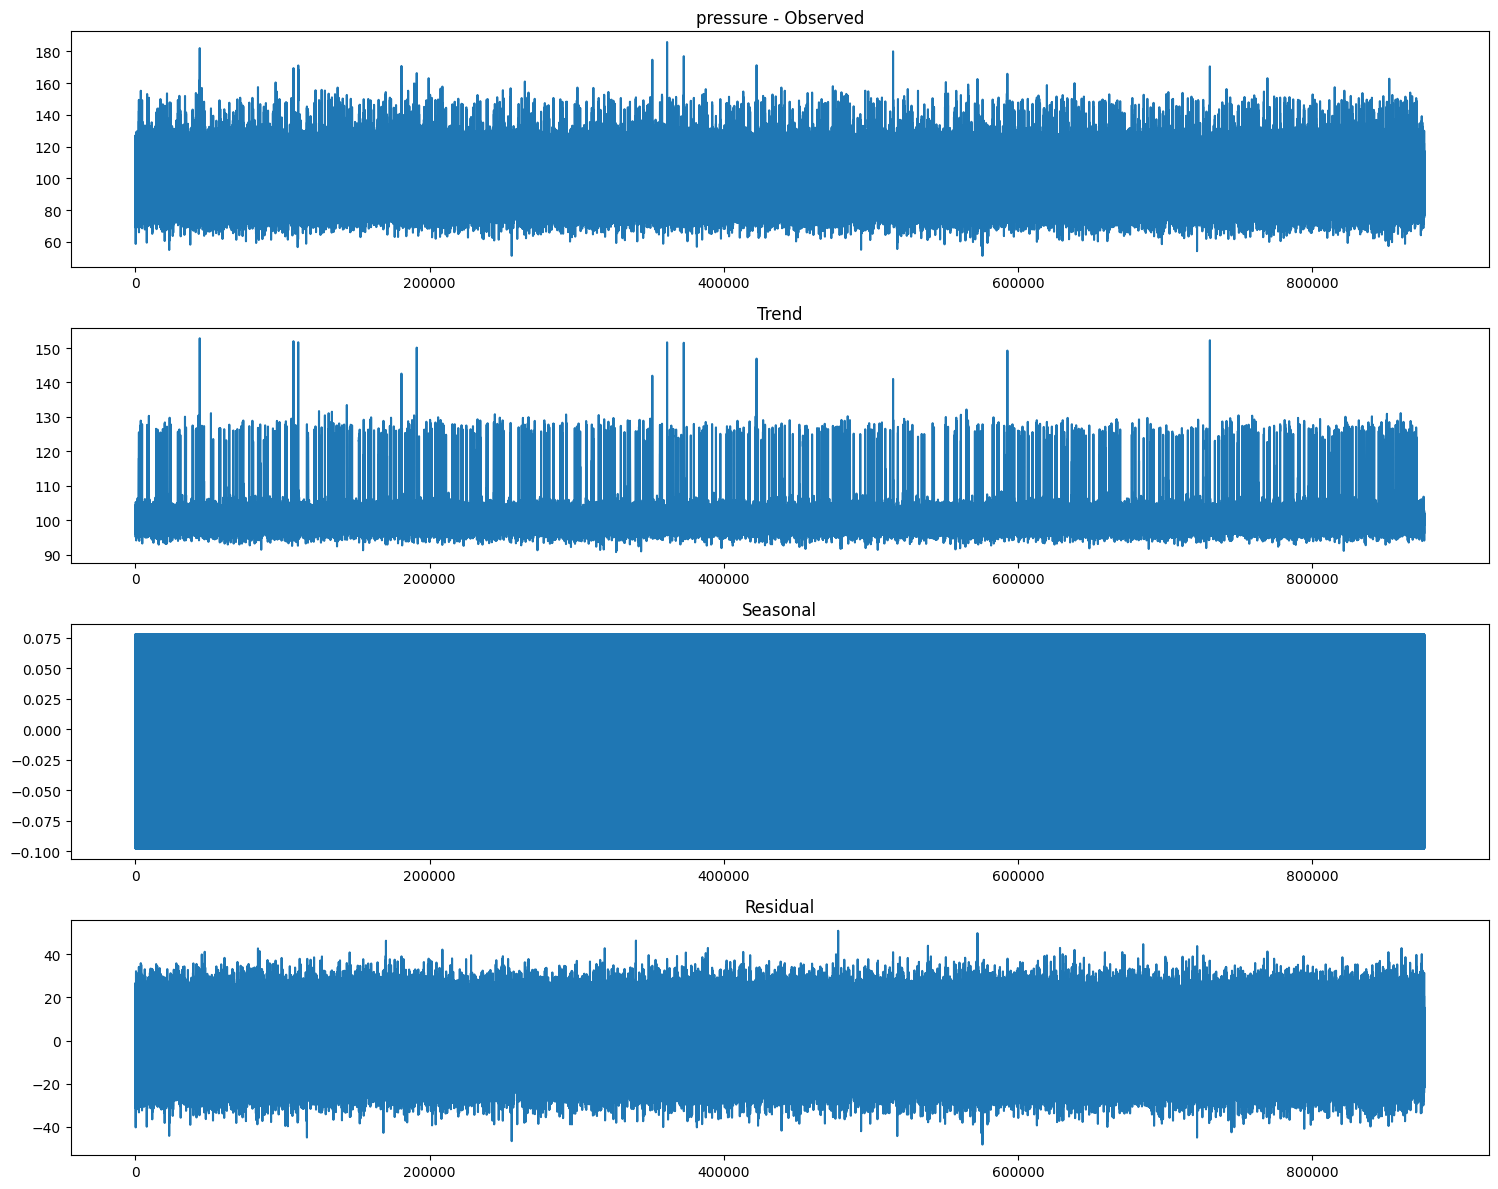

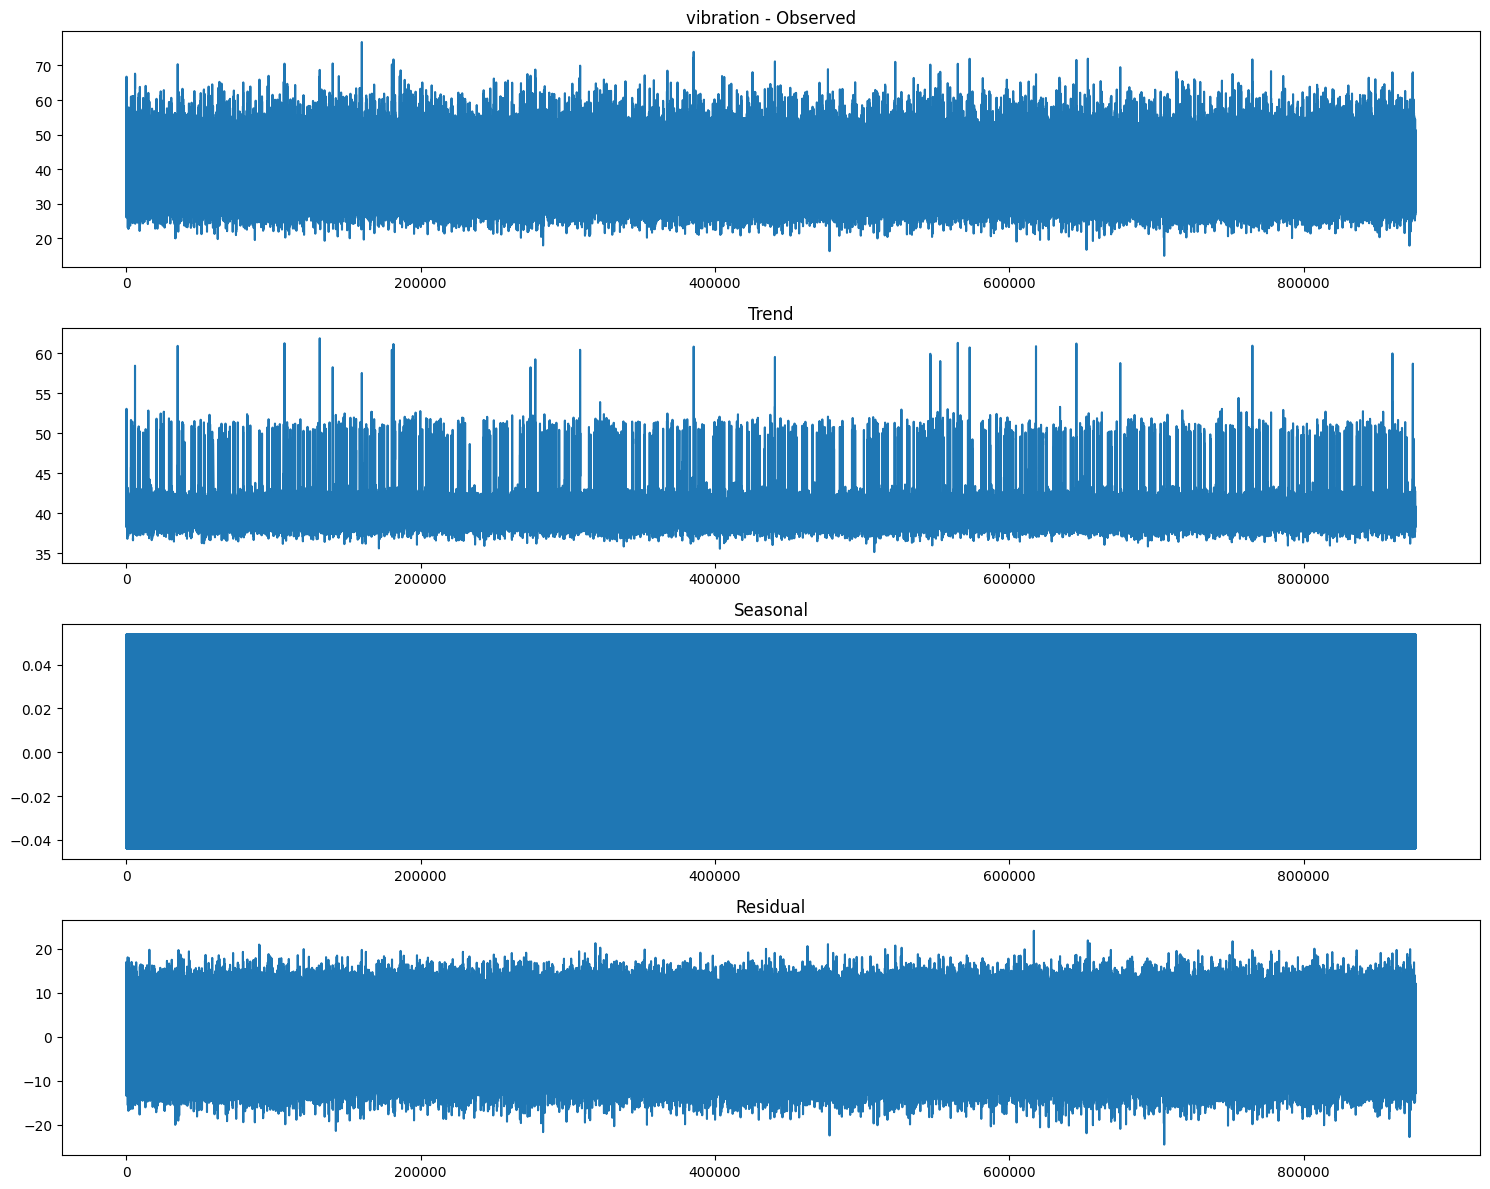

In [9]:
def plot_seasonal_decompose(series, title):
    result = seasonal_decompose(series, model='additive', period=24)  # Assuming hourly data
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    result.observed.plot(ax=ax1)
    ax1.set_title(f'{title} - Observed')
    result.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    result.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal')
    result.resid.plot(ax=ax4)
    ax4.set_title('Residual')
    plt.tight_layout()
    plt.show()

for column in ['volt', 'rotate', 'pressure', 'vibration']:
    plot_seasonal_decompose(telemetry[column], column)

### 2.4 Distribution of the Data

Normality Tests for volt
Shapiro-Wilk Test:
Statistics=0.999489, p-value=0.000000
D'Agostino's K^2 Test:
Statistics=1526.615606, p-value=0.000000
Anderson-Darling Test:
Statistic: 61.562842
At 15.0%: 0.576
At 10.0%: 0.656
At 5.0%: 0.787
At 2.5%: 0.918
At 1.0%: 1.092


/Users/inaki/Documents/Personal/QuadSci/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 876100.
  res = hypotest_fun_out(*samples, **kwds)


Kolmogorov-Smirnov Test:
Statistics=1.000000, p-value=0.000000

Visual Tests:


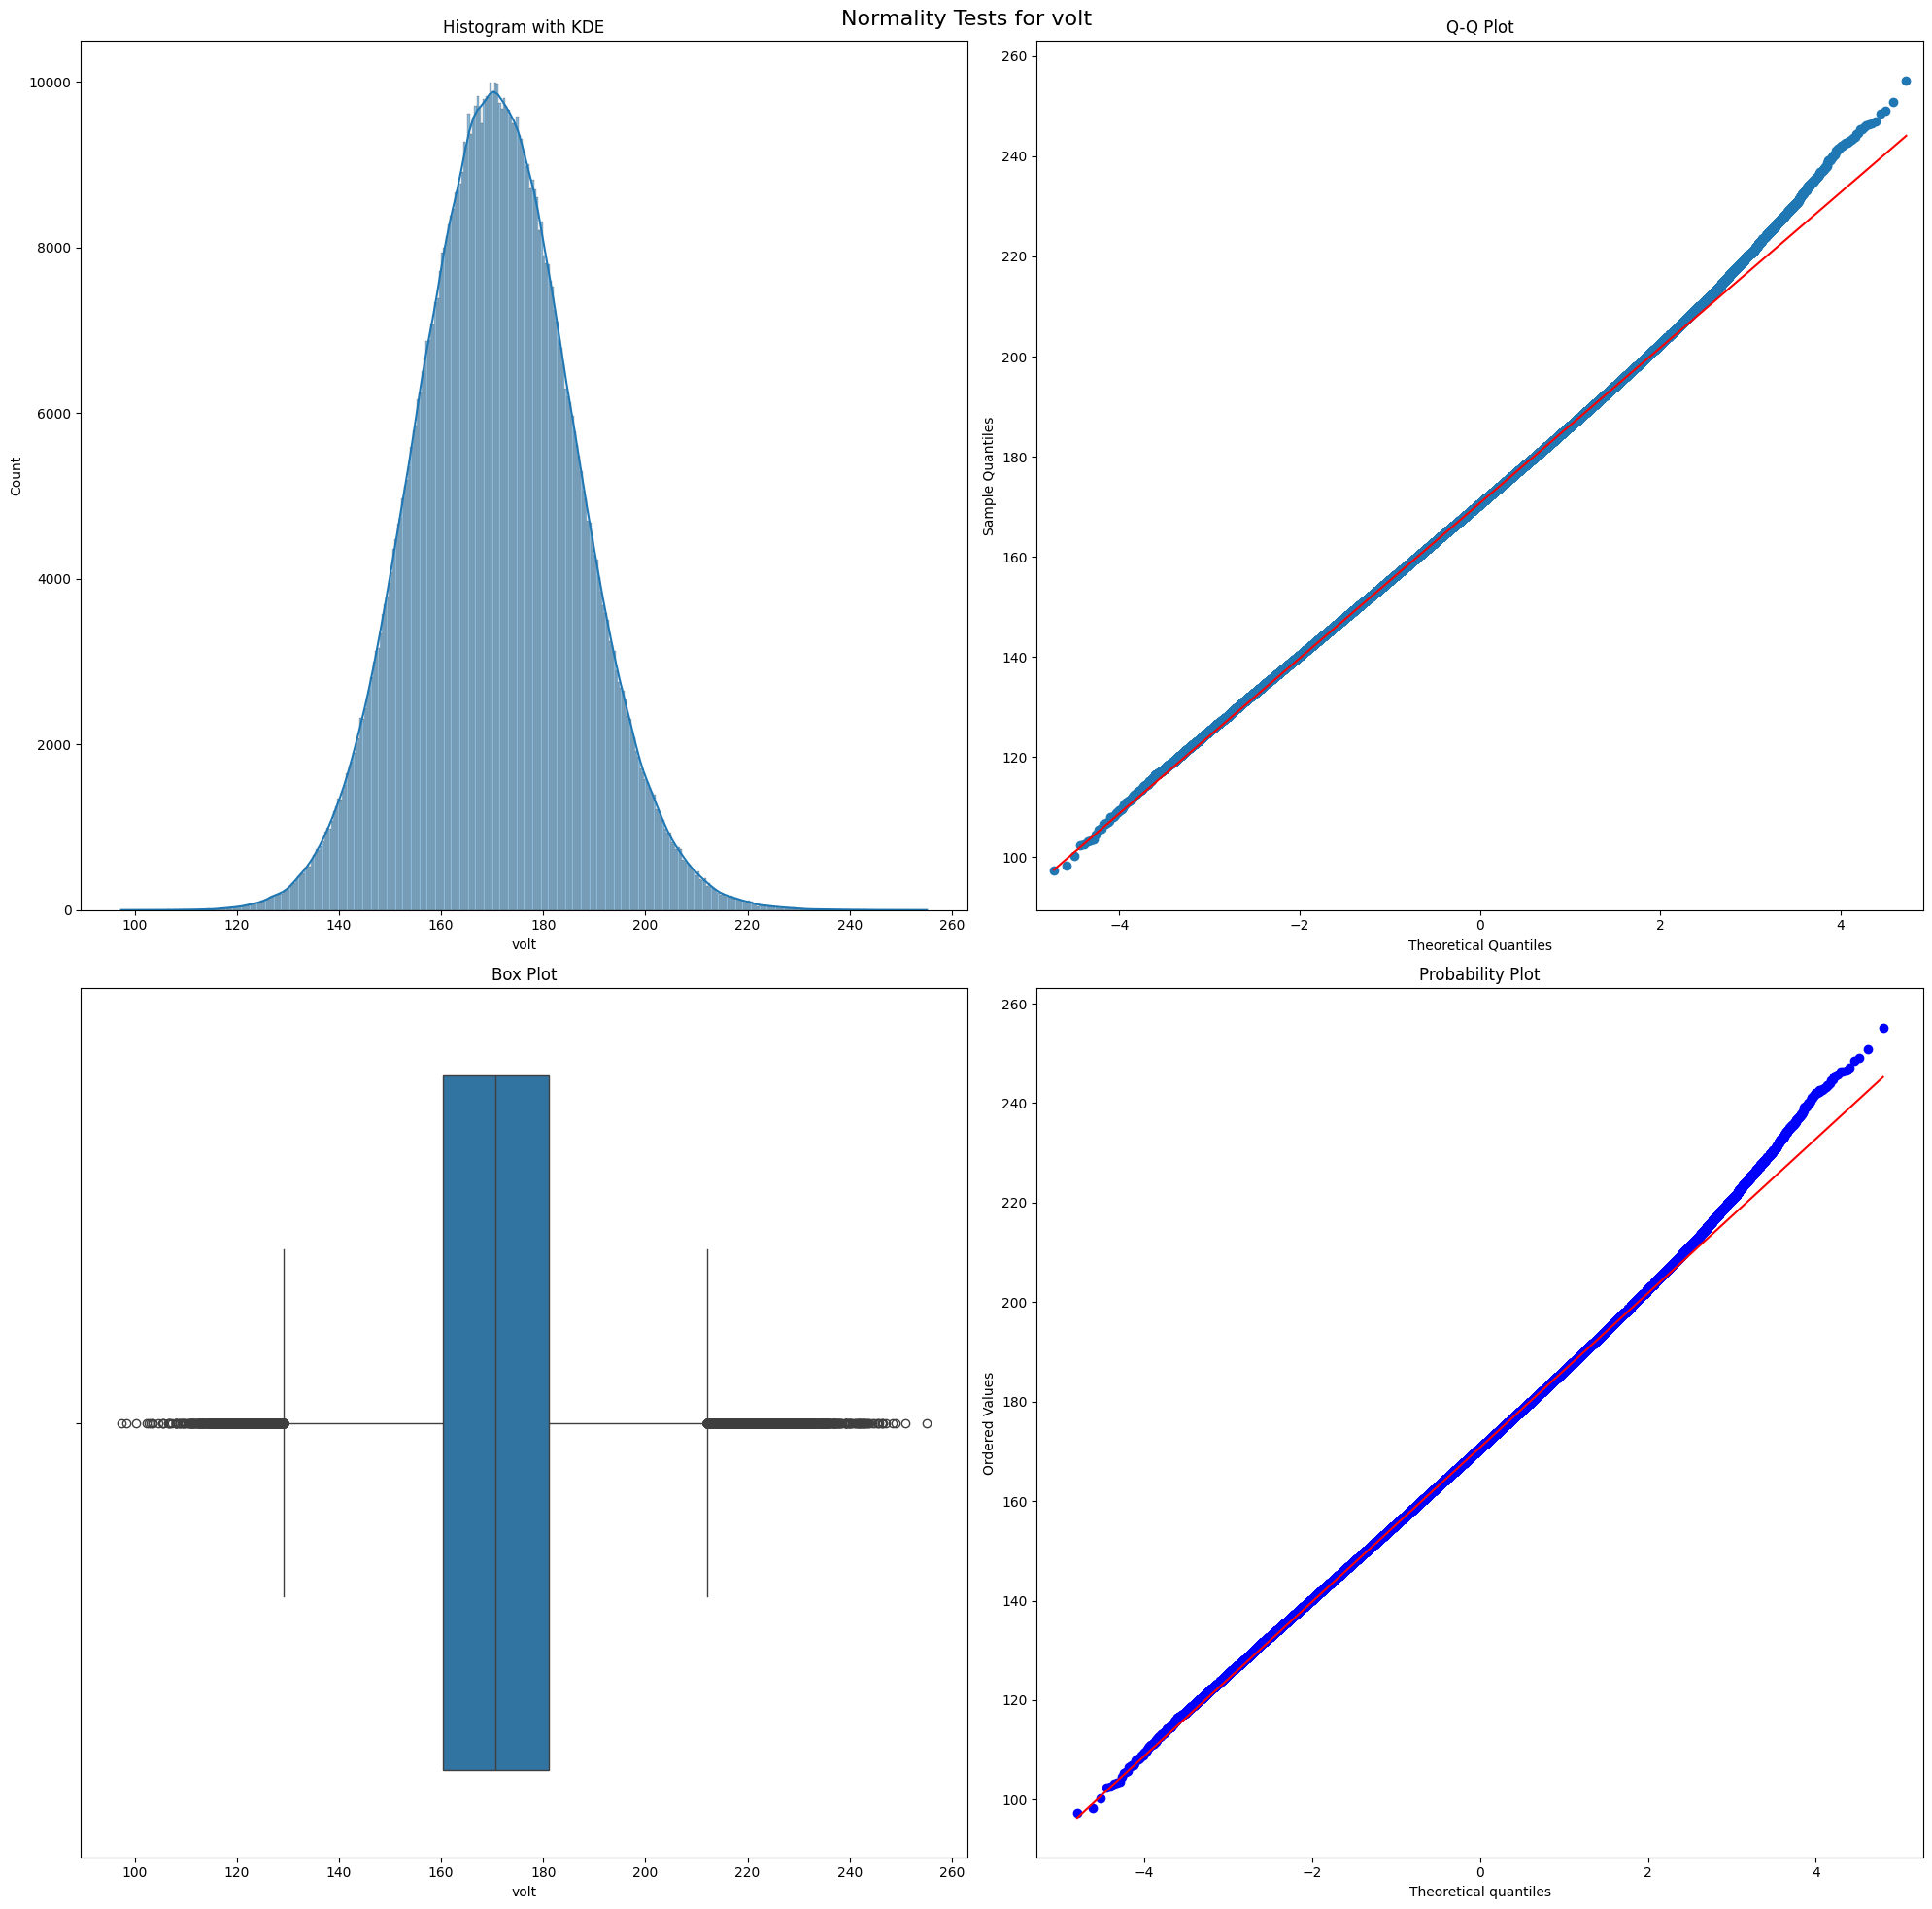



Normality Tests for rotate
Shapiro-Wilk Test:
Statistics=0.998681, p-value=0.000000
D'Agostino's K^2 Test:
Statistics=4172.114928, p-value=0.000000


/Users/inaki/Documents/Personal/QuadSci/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 876100.
  res = hypotest_fun_out(*samples, **kwds)


Anderson-Darling Test:
Statistic: 167.677046
At 15.0%: 0.576
At 10.0%: 0.656
At 5.0%: 0.787
At 2.5%: 0.918
At 1.0%: 1.092
Kolmogorov-Smirnov Test:
Statistics=1.000000, p-value=0.000000

Visual Tests:


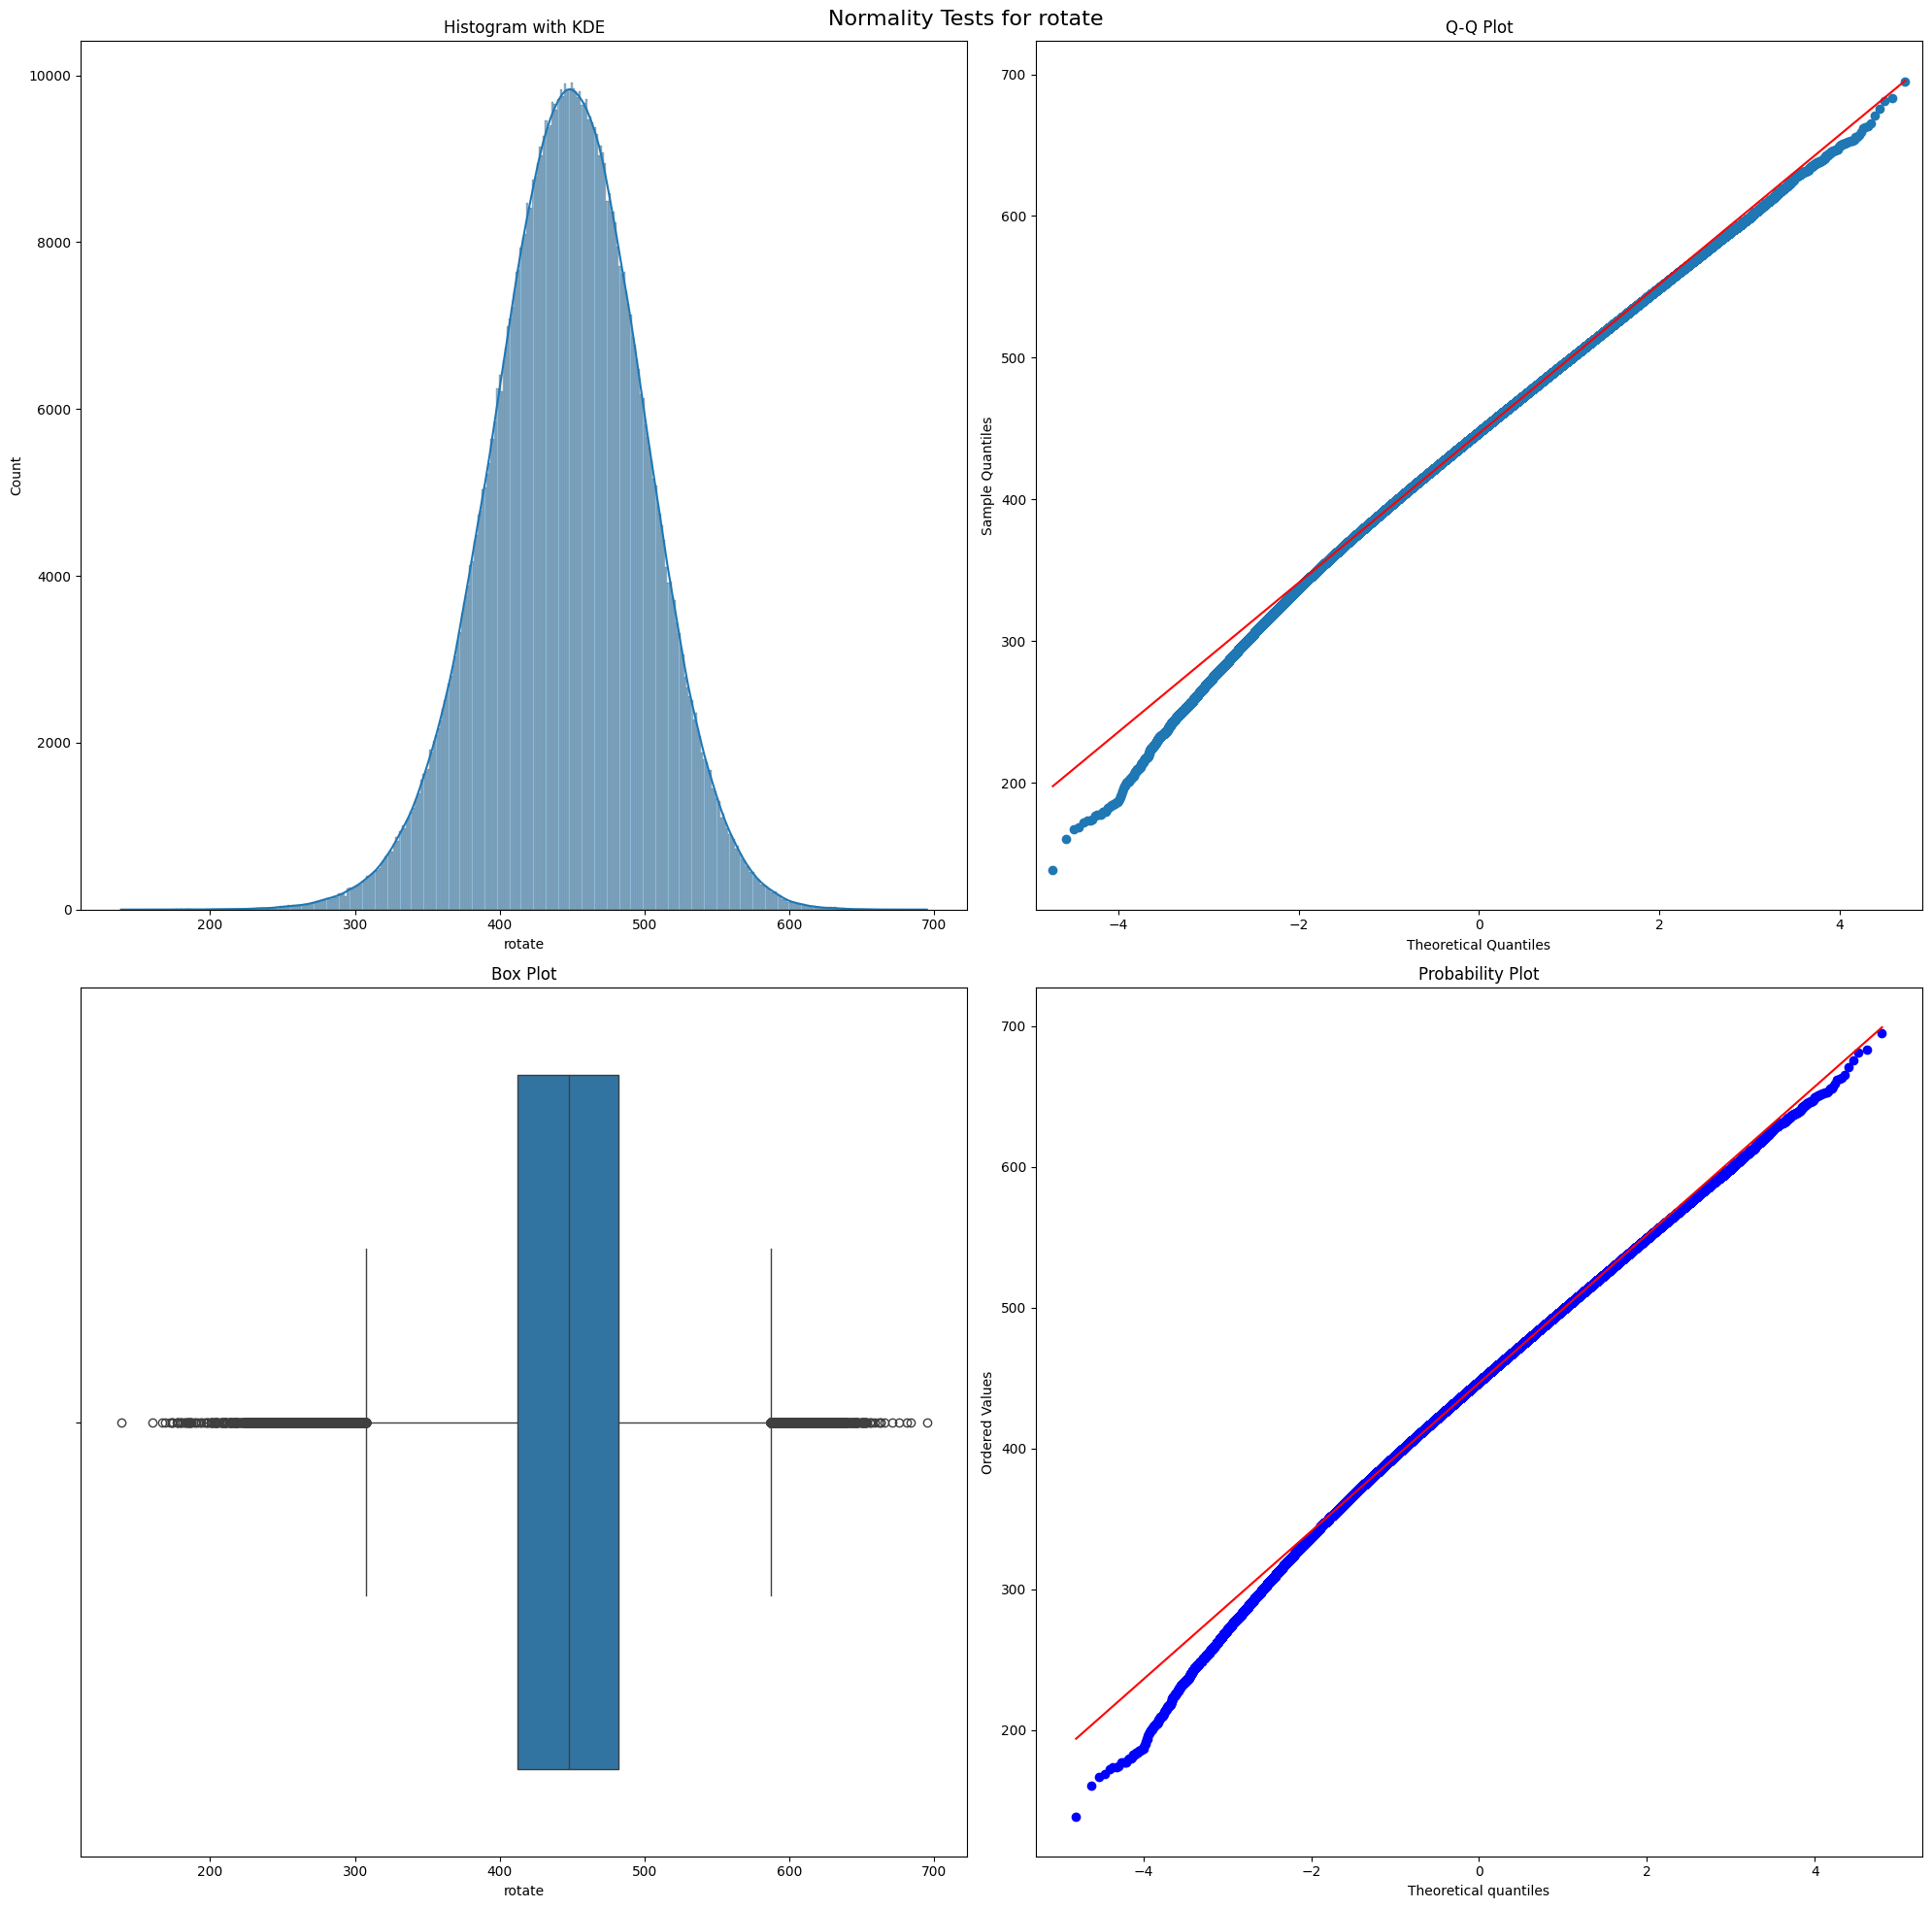



Normality Tests for pressure
Shapiro-Wilk Test:
Statistics=0.989997, p-value=0.000000
D'Agostino's K^2 Test:
Statistics=36072.522526, p-value=0.000000
Anderson-Darling Test:
Statistic: 1216.243363
At 15.0%: 0.576
At 10.0%: 0.656
At 5.0%: 0.787
At 2.5%: 0.918
At 1.0%: 1.092


/Users/inaki/Documents/Personal/QuadSci/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 876100.
  res = hypotest_fun_out(*samples, **kwds)


Kolmogorov-Smirnov Test:
Statistics=1.000000, p-value=0.000000

Visual Tests:


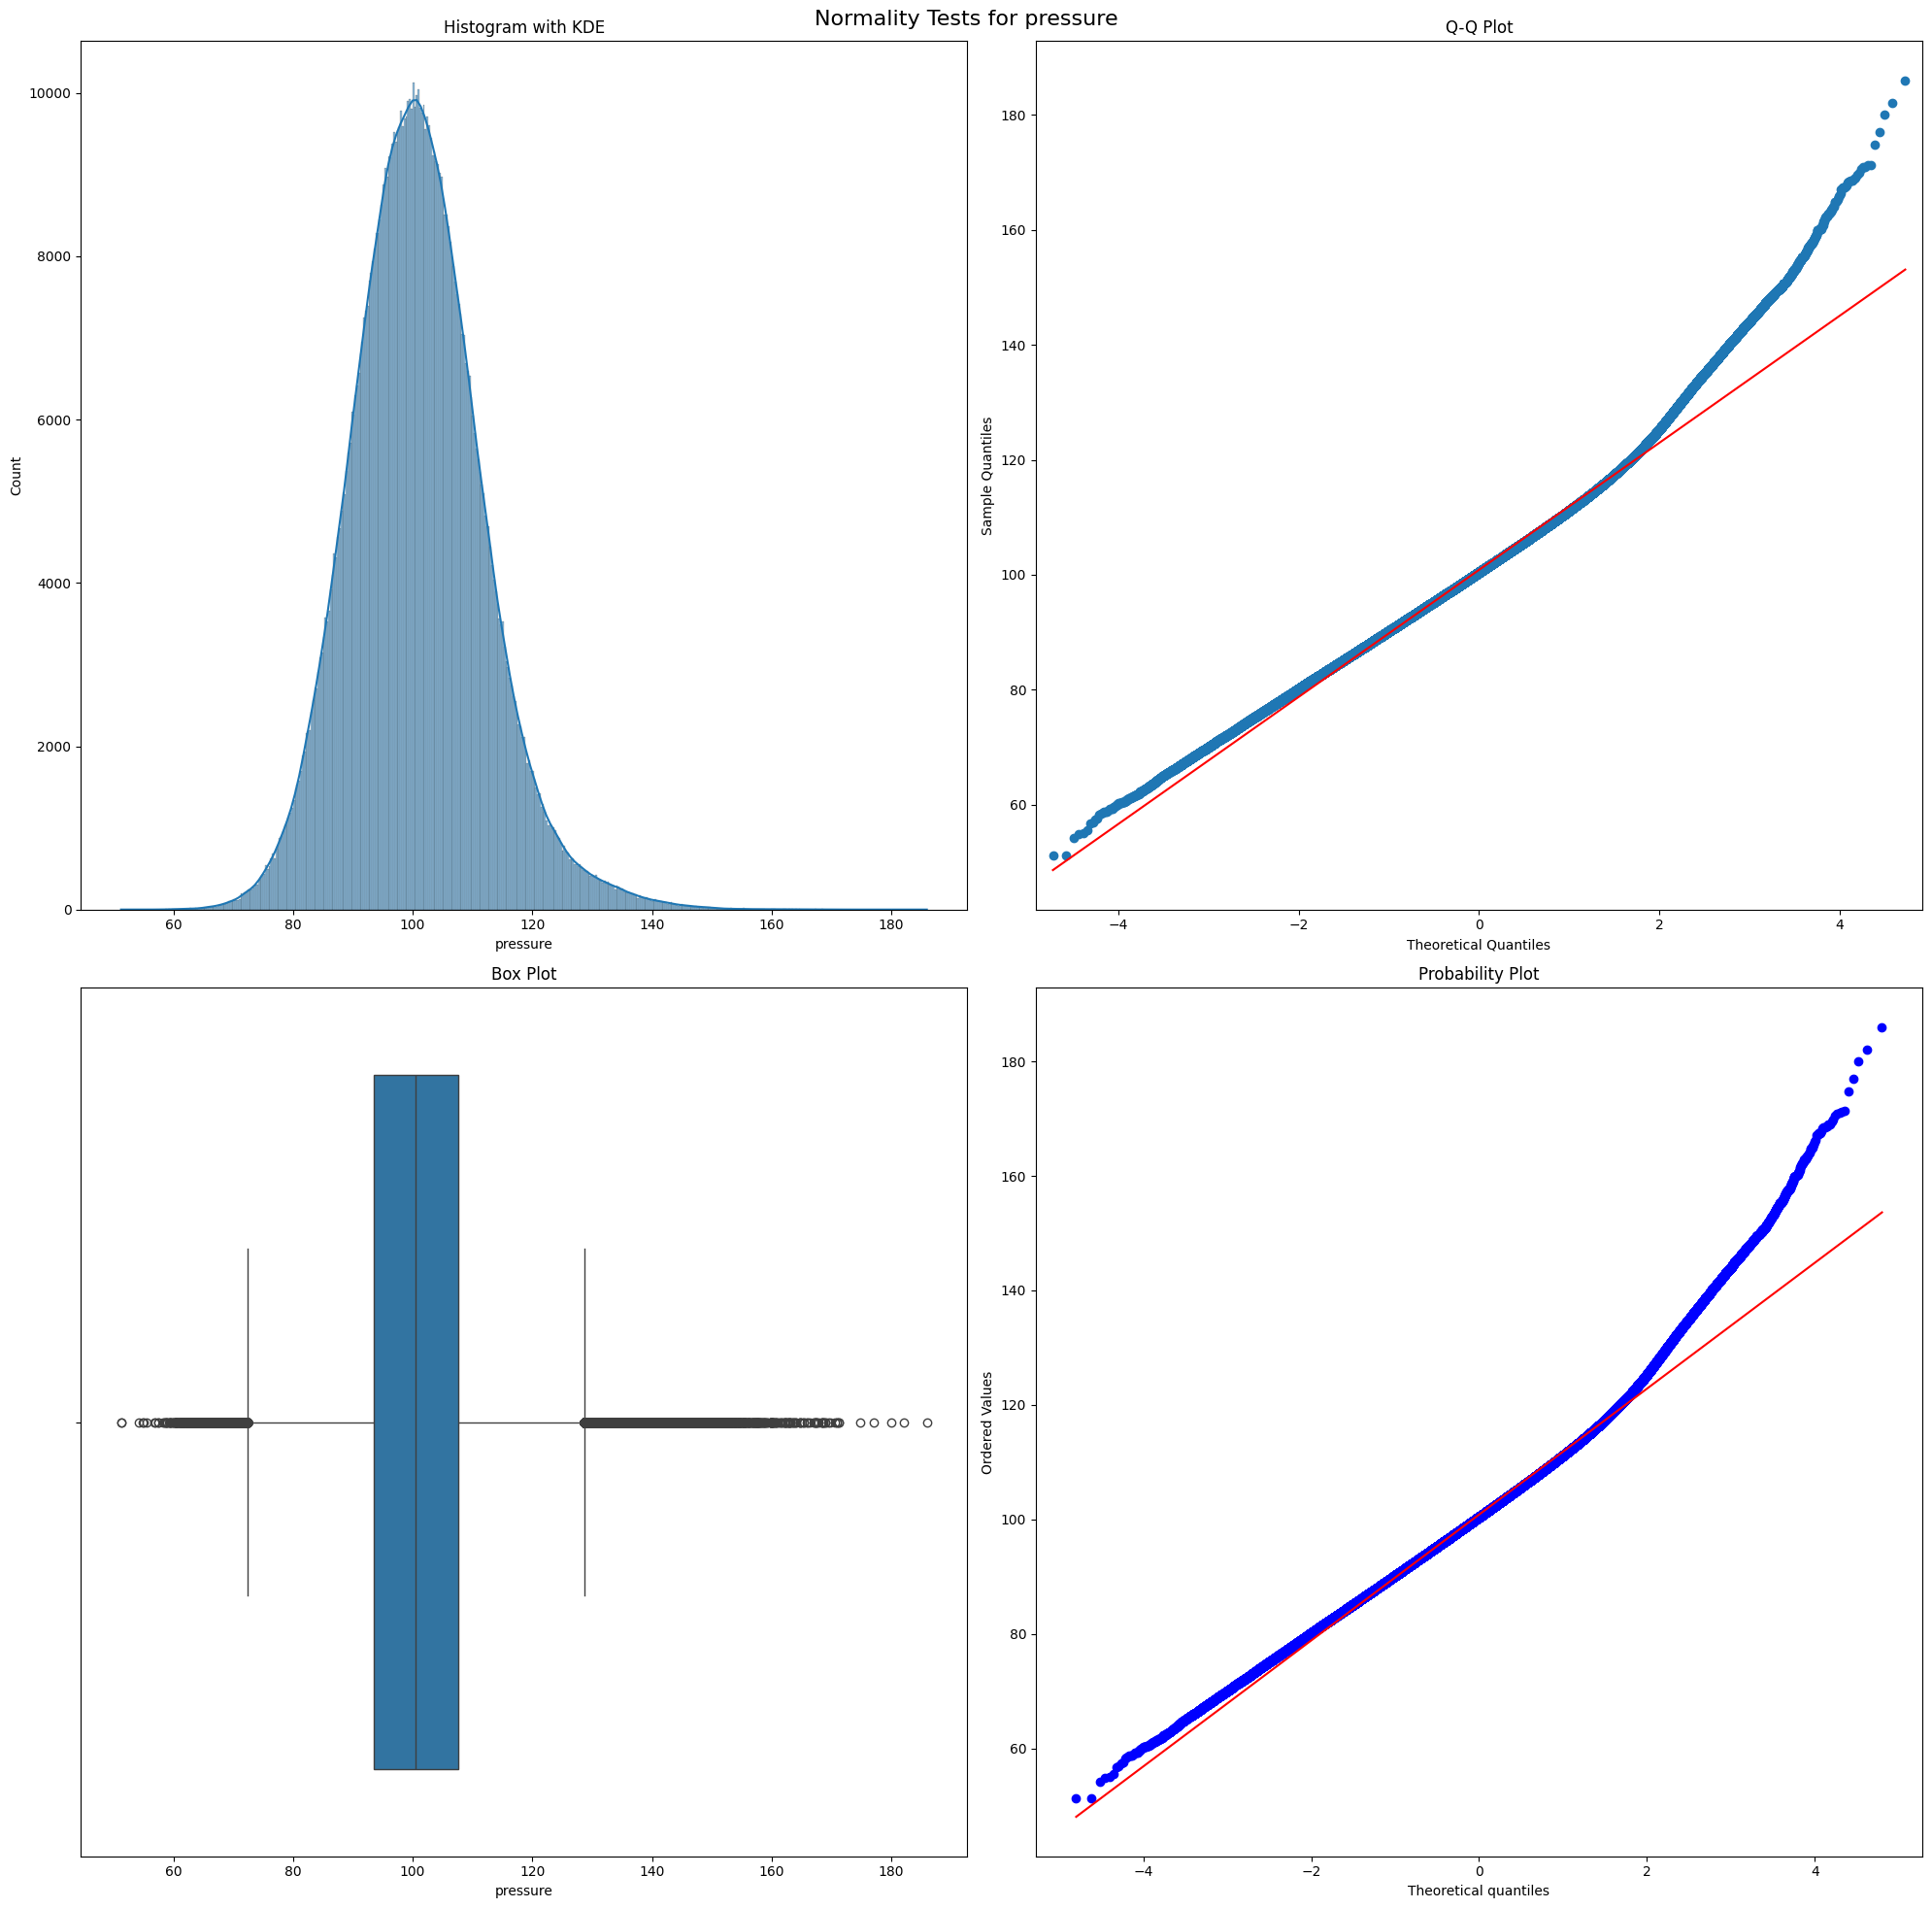



Normality Tests for vibration
Shapiro-Wilk Test:
Statistics=0.995966, p-value=0.000000
D'Agostino's K^2 Test:
Statistics=14034.751328, p-value=0.000000
Anderson-Darling Test:
Statistic: 469.851379
At 15.0%: 0.576
At 10.0%: 0.656
At 5.0%: 0.787
At 2.5%: 0.918
At 1.0%: 1.092


/Users/inaki/Documents/Personal/QuadSci/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 876100.
  res = hypotest_fun_out(*samples, **kwds)


Kolmogorov-Smirnov Test:
Statistics=1.000000, p-value=0.000000

Visual Tests:


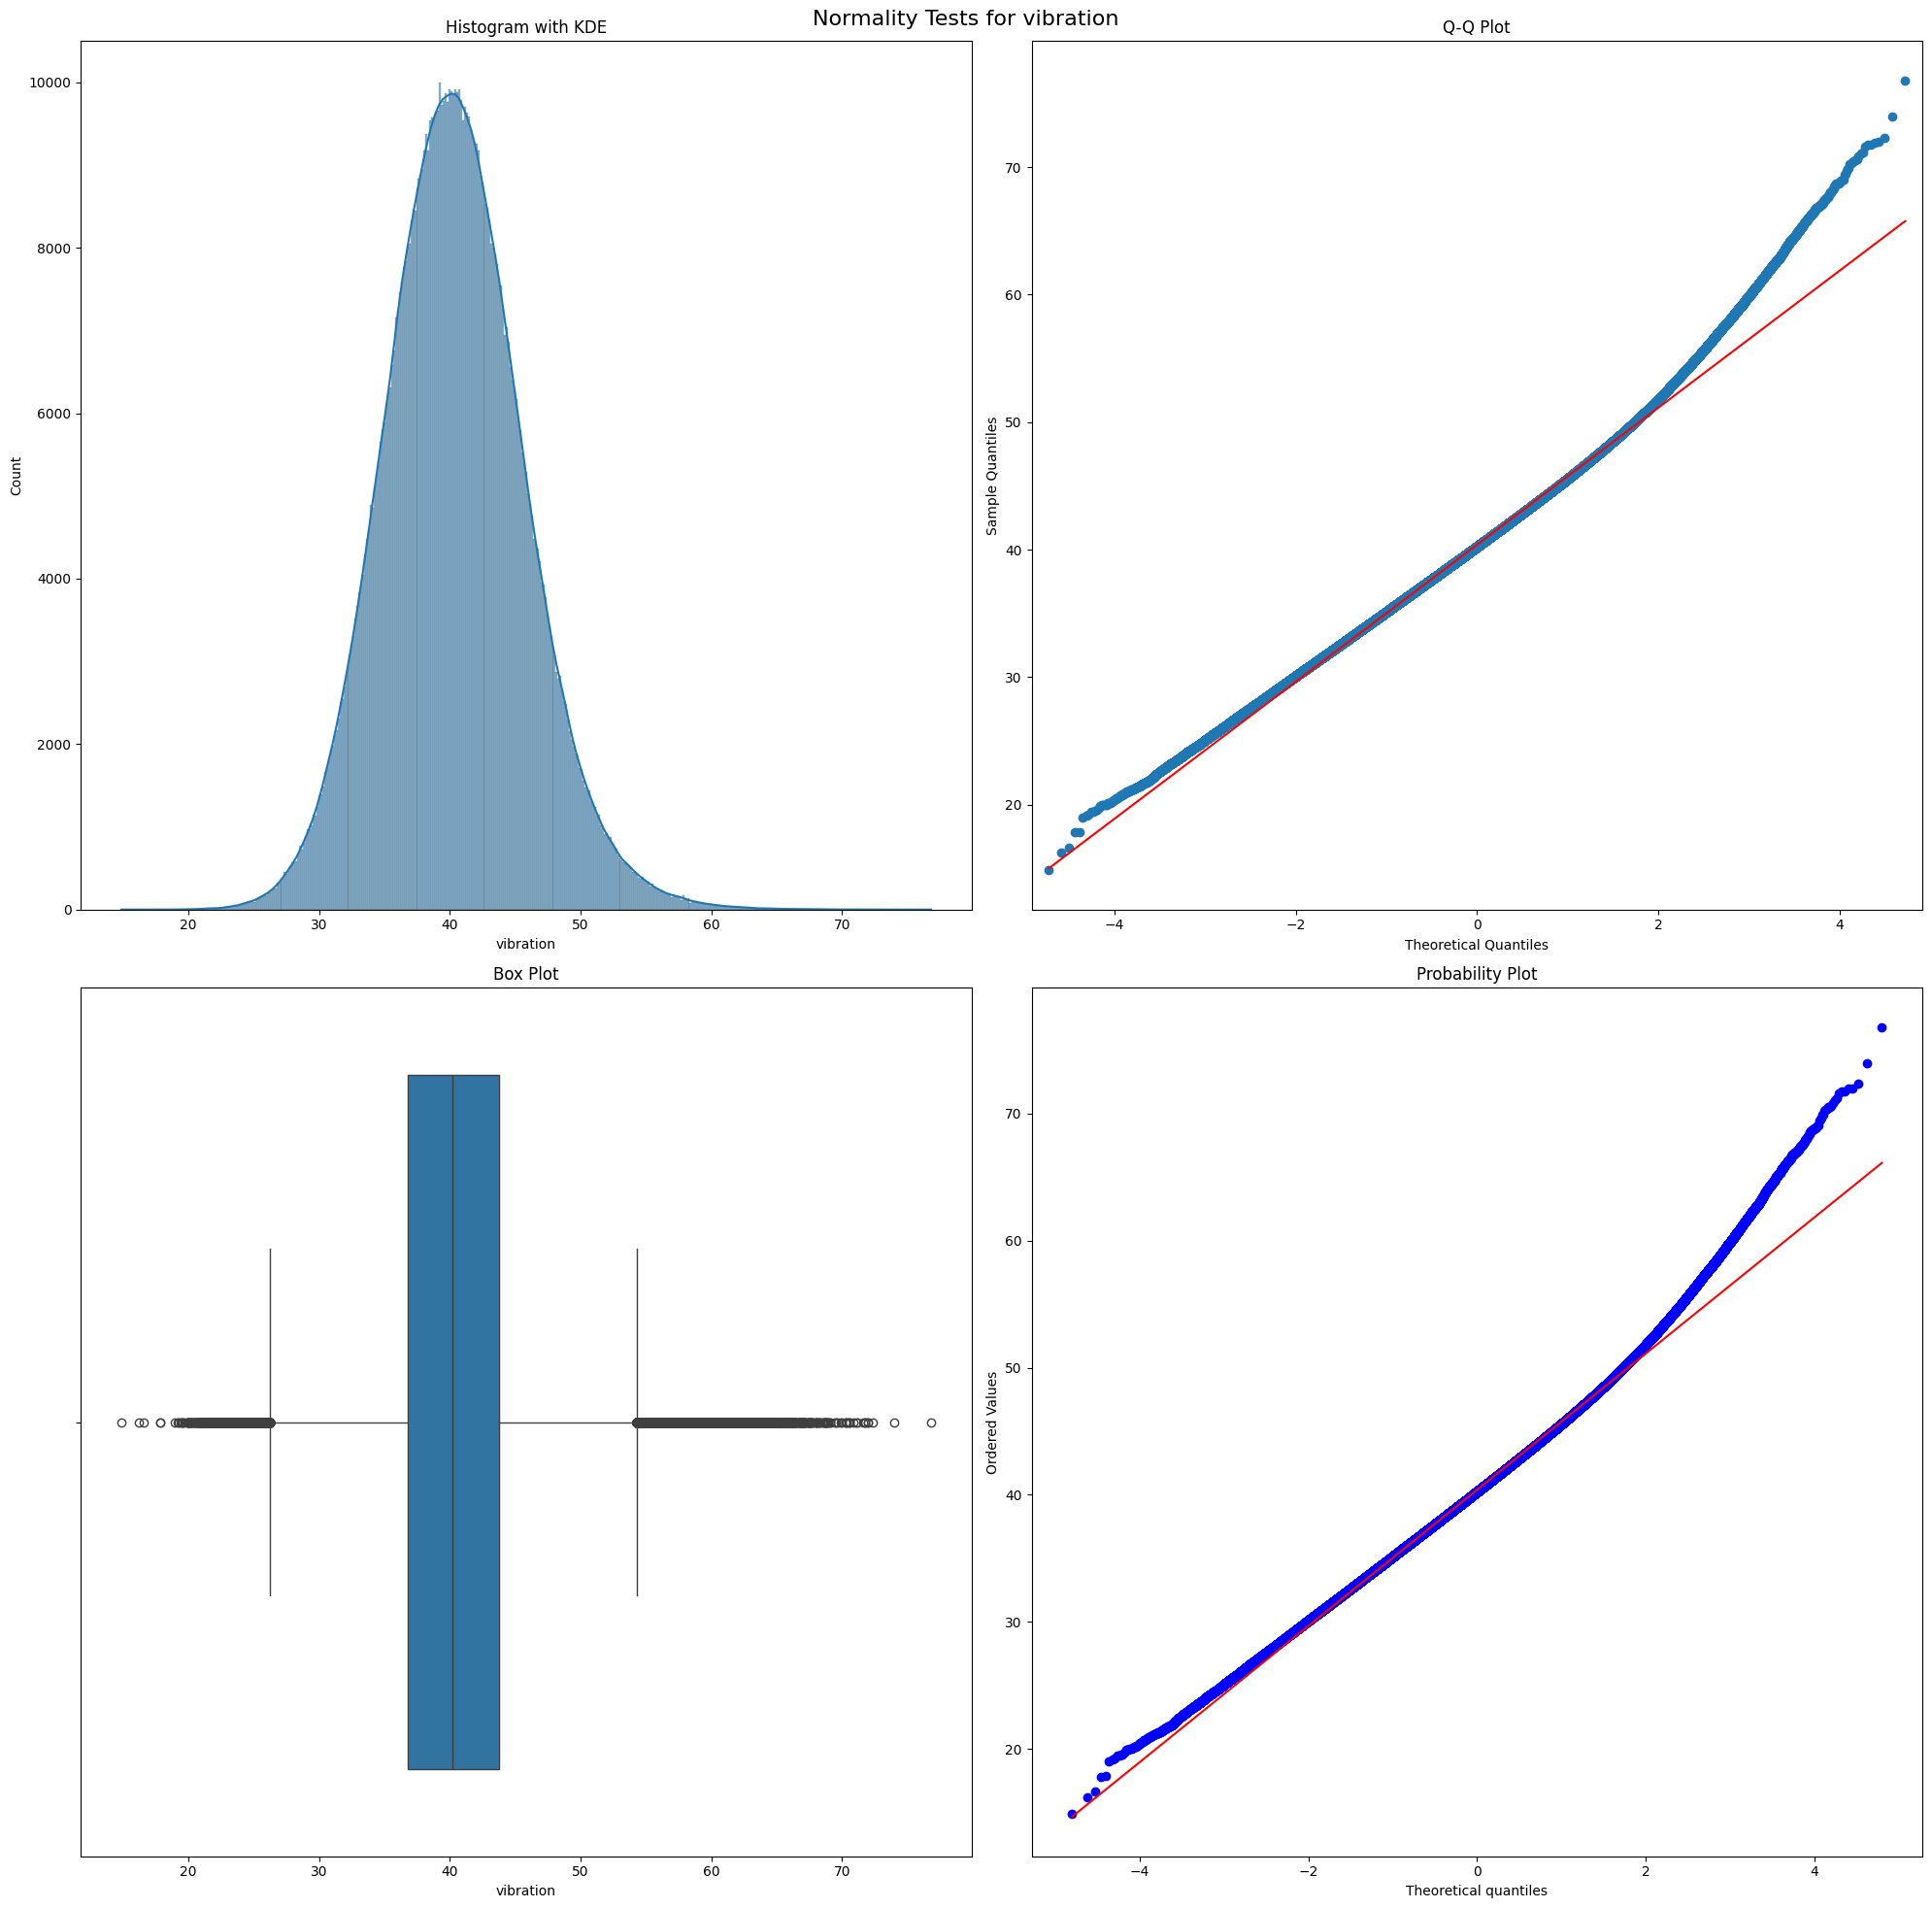

In [10]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

def comprehensive_normality_test(data, columns, figsize=(20, 5*4)):
    for column in columns:
        print(f"Normality Tests for {column}")
        
        # 1. Shapiro-Wilk Test
        stat, p = stats.shapiro(data[column].dropna())
        print('Shapiro-Wilk Test:')
        print(f'Statistics={stat:.6f}, p-value={p:.6f}')
        
        # 2. D'Agostino's K^2 Test
        stat, p = stats.normaltest(data[column].dropna())
        print("D'Agostino's K^2 Test:")
        print(f'Statistics={stat:.6f}, p-value={p:.6f}')
        
        # 3. Anderson-Darling Test
        result = stats.anderson(data[column].dropna())
        print('Anderson-Darling Test:')
        print(f'Statistic: {result.statistic:.6f}')
        for i in range(len(result.critical_values)):
            sl, cv = result.significance_level[i], result.critical_values[i]
            print(f'At {sl:.1f}%: {cv:.3f}')
        
        # 4. Kolmogorov-Smirnov Test
        stat, p = stats.kstest(data[column].dropna(), 'norm')
        print('Kolmogorov-Smirnov Test:')
        print(f'Statistics={stat:.6f}, p-value={p:.6f}')
        
        print("\nVisual Tests:")
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle(f'Normality Tests for {column}', fontsize=16)
        
        # 5. Histogram with KDE
        sns.histplot(data[column].dropna(), kde=True, ax=ax1)
        ax1.set_title('Histogram with KDE')
        
        # 6. Q-Q Plot
        qqplot(data[column].dropna(), line='s', ax=ax2)
        ax2.set_title('Q-Q Plot')
        
        # 7. Box Plot
        sns.boxplot(x=data[column].dropna(), ax=ax3)
        ax3.set_title('Box Plot')
        
        # 8. Probability Plot
        stats.probplot(data[column].dropna(), dist="norm", plot=ax4)
        ax4.set_title('Probability Plot')
        
        plt.tight_layout()
        plt.show()
        
        print("\n" + "="*50 + "\n")

# Assuming 'telemetry' is your DataFrame
columns_to_test = ['volt', 'rotate', 'pressure', 'vibration']
comprehensive_normality_test(telemetry, columns_to_test)

### 2.5 Check for Sparse Data

In [11]:
print("Data points per day in average Telemetry:")
print(telemetry.set_index('datetime').resample('D').size().mean())

Data points per day in average Telemetry:
2393.7158469945357


### 2.6 Multiple Seasonality Analysis

In [12]:
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose

def detect_seasonality(data, column, max_lag=365, threshold=0.1):
    # Compute autocorrelation
    autocorr = acf(data[column], nlags=max_lag)
    
    # Find peaks in autocorrelation
    peaks, _ = signal.find_peaks(autocorr, height=threshold)
    
    return peaks

def fft_seasonality(data, column, top_n=5):
    # Compute FFT
    fft_result = np.fft.fft(data[column])
    frequencies = np.fft.fftfreq(len(data[column]))
    
    # Get the dominant frequencies
    dominant_freq_indices = np.argsort(np.abs(fft_result))[-top_n:]
    dominant_periods = 1 / np.abs(frequencies[dominant_freq_indices])
    
    return dominant_periods[dominant_periods != np.inf]  # Remove infinite periods

def multiple_seasonality_test(data, columns, max_lag=365, threshold=0.1, top_n=5):
    for column in columns:
        print(f"Multiple Seasonality Analysis for {column}")
        
        # 1. Peak detection in ACF
        peaks = detect_seasonality(data, column, max_lag, threshold)
        print("Potential seasonal periods (ACF method):")
        print(peaks)
        
        # 2. FFT method
        dominant_periods = fft_seasonality(data, column, top_n)
        print("\nDominant periods (FFT method):")
        print(dominant_periods)
        
        # 3. Seasonal Decomposition
        try:
            result = seasonal_decompose(data[column], model='additive', period=24)  # Assuming hourly data
            strength = 1 - np.var(result.resid) / np.var(result.observed - result.trend)
            print(f"\nStrength of seasonality (period=24): {strength:.4f}")
        except Exception as e:
            print(f"Error in seasonal decomposition: {str(e)}")
        
        print("\n" + "="*50 + "\n")

# Assuming 'telemetry' is your DataFrame
columns_to_test = ['volt', 'rotate', 'pressure', 'vibration']
multiple_seasonality_test(telemetry, columns_to_test)

Multiple Seasonality Analysis for volt
Potential seasonal periods (ACF method):
[]

Dominant periods (FFT method):
[1856.1440678  1856.1440678  3842.54385965 3842.54385965]

Strength of seasonality (period=24): 0.0000


Multiple Seasonality Analysis for rotate


/var/folders/md/ynd5h8zs23v0pvc74v_gly0m0000gn/T/ipykernel_78342/3109031372.py:23: RuntimeWarning: divide by zero encountered in divide
  dominant_periods = 1 / np.abs(frequencies[dominant_freq_indices])


Potential seasonal periods (ACF method):
[]

Dominant periods (FFT method):
[362.3242349  362.3242349  502.35091743 502.35091743]

Strength of seasonality (period=24): 0.0000


Multiple Seasonality Analysis for pressure
Potential seasonal periods (ACF method):
[]

Dominant periods (FFT method):
[178.46811978 178.46811978 186.9611609  186.9611609 ]

Strength of seasonality (period=24): 0.0000


Multiple Seasonality Analysis for vibration
Potential seasonal periods (ACF method):
[]

Dominant periods (FFT method):
[ 289.0465193   289.0465193  1220.19498607 1220.19498607]

Strength of seasonality (period=24): 0.0000




In [13]:
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose

def group_data_daily(data):
    # Ensure datetime index
    if not isinstance(data.index, pd.DatetimeIndex):
        data['datetime'] = pd.to_datetime(data['datetime'])
        data.set_index('datetime', inplace=True)
    
    # Group by day and calculate mean
    daily_data = data.resample('D').mean()
    return daily_data

def detect_seasonality(data, column, max_lag=365, threshold=0.05):
    # Compute autocorrelation
    autocorr = acf(data[column].dropna(), nlags=max_lag)
    
    # Find peaks in autocorrelation
    peaks, _ = signal.find_peaks(autocorr, height=threshold)
    
    return peaks

def fft_seasonality(data, column, top_n=5):
    # Compute FFT
    series = data[column].dropna()
    fft_result = np.fft.fft(series)
    frequencies = np.fft.fftfreq(len(series))
    
    # Get the dominant frequencies
    dominant_freq_indices = np.argsort(np.abs(fft_result))[-top_n:]
    dominant_periods = 1 / np.abs(frequencies[dominant_freq_indices])
    
    return dominant_periods[np.isfinite(dominant_periods)]  # Remove infinite and NaN periods

def multiple_seasonality_test(data, columns, max_lag=365, threshold=0.05, top_n=5):
    for column in columns:
        print(f"Multiple Seasonality Analysis for {column}")
        
        # 1. Peak detection in ACF
        peaks = detect_seasonality(data, column, max_lag, threshold)
        print("Potential seasonal periods (ACF method):")
        print(peaks)
        
        # 2. FFT method
        dominant_periods = fft_seasonality(data, column, top_n)
        print("\nDominant periods in days (FFT method):")
        print(dominant_periods)
        
        # 3. Seasonal Decomposition for multiple periods
        for period in [7, 30, 90]:  # weekly, monthly, quarterly
            try:
                result = seasonal_decompose(data[column].dropna(), model='additive', period=period)
                strength = 1 - np.var(result.resid) / np.var(result.observed - result.trend)
                print(f"\nStrength of seasonality (period={period} days): {strength:.4f}")
            except Exception as e:
                print(f"Error in seasonal decomposition for period {period}: {str(e)}")
        
        print("\n" + "="*50 + "\n")

# Assuming 'telemetry' is your DataFrame
# First, group the data by day
daily_telemetry = group_data_daily(telemetry)

# Now run the seasonality analysis on the daily grouped data
columns_to_test = ['volt', 'rotate', 'pressure', 'vibration']
multiple_seasonality_test(daily_telemetry, columns_to_test)

# Optional: Print some basic statistics of the daily grouped data
print("Daily Telemetry Data Statistics:")
print(daily_telemetry.describe())

Multiple Seasonality Analysis for volt
Potential seasonal periods (ACF method):
[  4  14  18  46  60  64  74  81  89  95 113 120 134 139 141 152 182 187
 200 202 208 213 216 218 222 226 240 290 321 347]

Dominant periods in days (FFT method):
[ 7.46938776  7.46938776 15.25       15.25      ]

Strength of seasonality (period=7 days): 0.0109

Strength of seasonality (period=30 days): 0.1213

Strength of seasonality (period=90 days): 0.3360


Multiple Seasonality Analysis for rotate
Potential seasonal periods (ACF method):
[ 13  16  30  32  58  61  78  87  90 107 121 133 137 148 164 195 216 219
 224 227 232 256]

Dominant periods in days (FFT method):
[ 5.30434783  5.30434783 15.25       15.25      ]

Strength of seasonality (period=7 days): 0.0104

Strength of seasonality (period=30 days): 0.1217

Strength of seasonality (period=90 days): 0.3253


Multiple Seasonality Analysis for pressure
Potential seasonal periods (ACF method):
[ 18  28  33  40  48  60  73  80  87  94 121 135 149 160 1

/var/folders/md/ynd5h8zs23v0pvc74v_gly0m0000gn/T/ipykernel_78342/3882675096.py:34: RuntimeWarning: divide by zero encountered in divide
  dominant_periods = 1 / np.abs(frequencies[dominant_freq_indices])


In [5]:
daily_telemetry.head()

,machineID,volt,rotate,pressure,vibration
datetime,,,,,
2015-01-01,50.5,173.056591,443.745266,102.328359,40.559718
2015-01-02,50.5,171.522218,444.755389,100.694954,40.723465
2015-01-03,50.5,170.587434,443.522215,100.735822,40.748247
2015-01-04,50.5,170.413780,445.387207,101.114545,40.433525
2015-01-05,50.5,170.896062,447.455870,101.251780,40.313698


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
import lightgbm as lgb
from utilsforecast.losses import rmse
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from functools import partial
from sklearn.preprocessing import StandardScaler

# Data Preparation
def prepare_daily_telemetry(telemetry):
    telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])
    telemetry.set_index('datetime', inplace=True)
    daily_telemetry = telemetry.resample('D').mean()
    return daily_telemetry

# Load your telemetry data
telemetry = pd.read_csv('./raw_data/PdM_telemetry.csv', parse_dates=['datetime'])
daily_telemetry = prepare_daily_telemetry(telemetry)

# Data preprocessing
def preprocess_data(data):
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
    return scaled_data, scaler

daily_telemetry_scaled, scaler = preprocess_data(daily_telemetry)

def prepare_data(data, column):
    df = data.reset_index()
    df['unique_id'] = f'{column}_series'
    df['y'] = df[column]
    df['ds'] = df['datetime']
    return df[['unique_id', 'ds', 'y']]

# Hyperparameter tuning for MSTL
def objective_mstl(params, data, column, forecast_horizon, n_windows):
    df = prepare_data(data, column)
    
    mstl = MSTL(
        season_length=[int(params['season_length_1']), int(params['season_length_2'])],
        trend_forecaster=AutoARIMA(nmodels=int(params['nmodels']))
    )
    
    sf = StatsForecast(
        models=[mstl],
        freq='D',
    )
    
    try:
        cv_results = sf.cross_validation(
            df=df,
            h=forecast_horizon,
            step_size=forecast_horizon,
            n_windows=n_windows
        )
        mape = rmse(cv_results, models=['MSTL'])['MSTL'].mean()
    except Exception as e:
        print(f"Error in MSTL cross-validation: {str(e)}")
        mape = np.inf
    
    return {'loss': mape, 'status': STATUS_OK}

# Hyperparameter tuning for LightGBM
def objective_lgb(params, data, column, forecast_horizon, n_windows):
    df = prepare_data(data, column)
    
    model = lgb.LGBMRegressor(
        n_estimators=int(params['n_estimators']),
        num_leaves=int(params['num_leaves']),
        learning_rate=params['learning_rate'],
        random_state=0,
        min_child_samples=20,
        min_data_in_leaf=20,
        min_sum_hessian_in_leaf=1e-3,
        lambda_l1=0.1,
        lambda_l2=0.1,
    )
    
    mlf = MLForecast(
        models=[model],
        freq='D',
        lags=[1, 7, 14],
        target_transforms=[Differences([1, 7])],
    )
    
    try:
        cv_results = mlf.cross_validation(
            df=df,
            h=forecast_horizon,
            n_windows=n_windows
        )
        mape = rmse(cv_results, models=['LGBMRegressor'])['LGBMRegressor'].mean()
    except Exception as e:
        print(f"Error in LightGBM cross-validation: {str(e)}")
        mape = np.inf
    
    return {'loss': mape, 'status': STATUS_OK}

def tune_hyperparameters(data, column, forecast_horizon, n_windows):
    # MSTL space
    space_mstl = {
        'season_length_1': hp.quniform('season_length_1', 5, 14, 1),
        'season_length_2': hp.quniform('season_length_2', 20, 40, 1),
        'nmodels': hp.quniform('nmodels', 5, 20, 1)
    }
    
    # LightGBM space
    space_lgb = {
        'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
        'num_leaves': hp.quniform('num_leaves', 20, 100, 1),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3))
    }
    
    # Optimize MSTL
    best_mstl = fmin(
        fn=partial(objective_mstl, data=data, column=column, forecast_horizon=forecast_horizon, n_windows=n_windows),
        space=space_mstl,
        algo=tpe.suggest,
        max_evals=50
    )
    
    # Optimize LightGBM
    best_lgb = fmin(
        fn=partial(objective_lgb, data=data, column=column, forecast_horizon=forecast_horizon, n_windows=n_windows),
        space=space_lgb,
        algo=tpe.suggest,
        max_evals=50
    )
    
    return best_mstl, best_lgb

def evaluate_forecasts(actual, forecasts):
    mape_scores = {}
    for model in forecasts.columns:
        if model not in ['unique_id', 'ds', 'y', 'cutoff']:
            try:
                if pd.api.types.is_datetime64_any_dtype(forecasts['ds']):
                    forecasts['ds_numeric'] = (forecasts['ds'] - forecasts['ds'].min()).dt.total_seconds()
                    mape = rmse(forecasts, models=[model], id_col='ds_numeric')
                else:
                    mape = rmse(forecasts, models=[model], id_col='ds')
                mape_scores[model] = mape[model].mean()
            except KeyError:
                mape = np.sqrt(np.mean((forecasts[model].astype(float) - forecasts['y'].astype(float))**2))
                mape_scores[model] = mape
    return mape_scores

def plot_forecasts(actual, forecasts, column, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label='Actual', color='black')
    plt.plot(pd.to_datetime(forecasts['ds']), forecasts[model_name], label=model_name)
    plt.title(f'Forecasts for {column} using {model_name}')
    plt.legend()
    plt.show()

# Forecasting pipeline
columns_to_forecast = ['volt', 'rotate', 'pressure', 'vibration']
forecast_horizon = 30
n_windows = 3

results = {}

for column in columns_to_forecast:
    print(f"Tuning and forecasting {column}...")
    
    # Tune hyperparameters
    best_mstl, best_lgb = tune_hyperparameters(daily_telemetry_scaled, column, forecast_horizon, n_windows)
    
    # StatsForecast with tuned MSTL
    mstl = MSTL(
        season_length=[int(best_mstl['season_length_1']), int(best_mstl['season_length_2'])],
        trend_forecaster=AutoARIMA(nmodels=int(best_mstl['nmodels']))
    )
    sf = StatsForecast(models=[mstl], freq='D')
    sf_cv = sf.cross_validation(df=prepare_data(daily_telemetry_scaled, column), h=forecast_horizon, step_size=forecast_horizon, n_windows=n_windows)
    
    # MLForecast with tuned LightGBM
    lgb_model = lgb.LGBMRegressor(
        n_estimators=int(best_lgb['n_estimators']),
        num_leaves=int(best_lgb['num_leaves']),
        learning_rate=best_lgb['learning_rate'],
        random_state=0,
        min_child_samples=20,
        min_data_in_leaf=20,
        min_sum_hessian_in_leaf=1e-3,
        lambda_l1=0.1,
        lambda_l2=0.1,
    )
    mlf = MLForecast(
        models=[lgb_model],
        freq='D',
        lags=[1, 7, 14],
        target_transforms=[Differences([1, 7])],
    )
    mlf_cv = mlf.cross_validation(df=prepare_data(daily_telemetry_scaled, column), h=forecast_horizon, n_windows=n_windows)
    
    # Evaluate forecasts
    sf_mape = evaluate_forecasts(sf_cv['y'], sf_cv)
    mlf_mape = evaluate_forecasts(mlf_cv['y'], mlf_cv)
    
    # Combine results
    results[column] = {**sf_mape, **mlf_mape}
    
    print(f"RMSE scores for {column}:")
    for model, mape in results[column].items():
        print(f"  {model}: {mape:.2f}")
    
    # Plot forecasts
    plot_forecasts(daily_telemetry[column], sf_cv, column, 'MSTL')
    plot_forecasts(daily_telemetry[column], mlf_cv, column, 'LGBMRegressor')

# Print overall results
print("\nOverall Results:")
for column, scores in results.items():
    print(f"\n{column}:")
    for model, mape in scores.items():
        print(f"  {model}: {mape:.2f}")

Tuning and forecasting volt...
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=7
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=7
  warnings.warn(



                    ds     cutoff           y        MSTL
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.607468
volt_series 2015-10-05 2015-10-03  171.727051  170.799042
volt_series 2015-10-06 2015-10-03  171.336823  170.977600
volt_series 2015-10-07 2015-10-03  170.694626  170.576279
volt_series 2015-10-08 2015-10-03  170.818619  170.337997
  2%|▏         | 1/50 [00:01<01:32,  1.89s/trial, best loss: 0.6831422448158264]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=7
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                       
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.856461
volt_series 2015-10-05 2015-10-03  171.727051  170.621902
volt_series 2015-10-06 2015-10-03  171.336823  170.946030
volt_series 2015-10-07 2015-10-03  170.694626  170.772049
volt_series 2015-10-08 2015-10-03  170.818619  171.002655
  4%|▍         | 2/50 [00:03<01:32,  1.93s/trial, best loss: 0.6831422448158264]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                       
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.967651
volt_series 2015-10-05 2015-10-03  171.727051  170.928223
volt_series 2015-10-06 2015-10-03  171.336823  171.632935
volt_series 2015-10-07 2015-10-03  170.694626  171.063034
volt_series 2015-10-08 2015-10-03  170.818619  170.826416
  6%|▌         | 3/50 [00:06<01:40,  2.13s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                       
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.999710
volt_series 2015-10-05 2015-10-03  171.727051  170.442383
volt_series 2015-10-06 2015-10-03  171.336823  170.918060
volt_series 2015-10-07 2015-10-03  170.694626  171.206253
volt_series 2015-10-08 2015-10-03  170.818619  170.808075
  8%|▊         | 4/50 [00:08<01:42,  2.23s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                       
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.741531
volt_series 2015-10-05 2015-10-03  171.727051  171.153244
volt_series 2015-10-06 2015-10-03  171.336823  170.581467
volt_series 2015-10-07 2015-10-03  170.694626  170.981552
volt_series 2015-10-08 2015-10-03  170.818619  170.795822
 10%|█         | 5/50 [00:11<01:50,  2.46s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                       
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  171.027954
volt_series 2015-10-05 2015-10-03  171.727051  170.496109
volt_series 2015-10-06 2015-10-03  171.336823  170.829712
volt_series 2015-10-07 2015-10-03  170.694626  171.107101
volt_series 2015-10-08 2015-10-03  170.818619  171.181274
 12%|█▏        | 6/50 [00:14<01:50,  2.51s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                       
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.426743
volt_series 2015-10-05 2015-10-03  171.727051  170.608719
volt_series 2015-10-06 2015-10-03  171.336823  170.501740
volt_series 2015-10-07 2015-10-03  170.694626  170.847168
volt_series 2015-10-08 2015-10-03  170.818619  170.575439
 14%|█▍        | 7/50 [00:16<01:48,  2.52s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                       
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.676529
volt_series 2015-10-05 2015-10-03  171.727051  171.075684
volt_series 2015-10-06 2015-10-03  171.336823  171.402802
volt_series 2015-10-07 2015-10-03  170.694626  170.636932
volt_series 2015-10-08 2015-10-03  170.818619  170.851486
 16%|█▌        | 8/50 [00:18<01:43,  2.47s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                       
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.589722
volt_series 2015-10-05 2015-10-03  171.727051  170.836945
volt_series 2015-10-06 2015-10-03  171.336823  170.452850
volt_series 2015-10-07 2015-10-03  170.694626  170.622040
volt_series 2015-10-08 2015-10-03  170.818619  170.811554
 18%|█▊        | 9/50 [00:21<01:44,  2.55s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                       
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  171.021393
volt_series 2015-10-05 2015-10-03  171.727051  171.074799
volt_series 2015-10-06 2015-10-03  171.336823  170.772949
volt_series 2015-10-07 2015-10-03  170.694626  170.989670
volt_series 2015-10-08 2015-10-03  170.818619  170.862427
 20%|██        | 10/50 [00:23<01:36,  2.40s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=7
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=7
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.697388
volt_series 2015-10-05 2015-10-03  171.727051  170.255493
volt_series 2015-10-06 2015-10-03  171.336823  170.584381
volt_series 2015-10-07 2015-10-03  170.694626  170.942078
volt_series 2015-10-08 2015-10-03  170.818619  170.915344
 22%|██▏       | 11/50 [00:25<01:27,  2.24s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=7
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=7
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=7
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.510178
volt_series 2015-10-05 2015-10-03  171.727051  170.536041
volt_series 2015-10-06 2015-10-03  171.336823  170.781387
volt_series 2015-10-07 2015-10-03  170.694626  170.784866
volt_series 2015-10-08 2015-10-03  170.818619  170.658630
 24%|██▍       | 12/50 [00:27<01:18,  2.08s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=7
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.713928
volt_series 2015-10-05 2015-10-03  171.727051  170.543533
volt_series 2015-10-06 2015-10-03  171.336823  171.050903
volt_series 2015-10-07 2015-10-03  170.694626  170.987671
volt_series 2015-10-08 2015-10-03  170.818619  170.868088
 26%|██▌       | 13/50 [00:29<01:16,  2.07s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.809402
volt_series 2015-10-05 2015-10-03  171.727051  171.007202
volt_series 2015-10-06 2015-10-03  171.336823  170.896835
volt_series 2015-10-07 2015-10-03  170.694626  170.667542
volt_series 2015-10-08 2015-10-03  170.818619  171.206039
 28%|██▊       | 14/50 [00:31<01:18,  2.19s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  171.066284
volt_series 2015-10-05 2015-10-03  171.727051  170.723373
volt_series 2015-10-06 2015-10-03  171.336823  170.682648
volt_series 2015-10-07 2015-10-03  170.694626  171.166183
volt_series 2015-10-08 2015-10-03  170.818619  171.003387
 30%|███       | 15/50 [00:34<01:23,  2.38s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.887970
volt_series 2015-10-05 2015-10-03  171.727051  170.449661
volt_series 2015-10-06 2015-10-03  171.336823  170.504044
volt_series 2015-10-07 2015-10-03  170.694626  170.488388
volt_series 2015-10-08 2015-10-03  170.818619  170.514465
 32%|███▏      | 16/50 [00:37<01:21,  2.40s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.384796
volt_series 2015-10-05 2015-10-03  171.727051  170.215042
volt_series 2015-10-06 2015-10-03  171.336823  170.370483
volt_series 2015-10-07 2015-10-03  170.694626  170.298660
volt_series 2015-10-08 2015-10-03  170.818619  169.923096
 34%|███▍      | 17/50 [00:39<01:15,  2.30s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.554550
volt_series 2015-10-05 2015-10-03  171.727051  170.005753
volt_series 2015-10-06 2015-10-03  171.336823  170.625900
volt_series 2015-10-07 2015-10-03  170.694626  170.855148
volt_series 2015-10-08 2015-10-03  170.818619  170.841812
 36%|███▌      | 18/50 [00:42<01:22,  2.58s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=8
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=8
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.427414
volt_series 2015-10-05 2015-10-03  171.727051  170.834198
volt_series 2015-10-06 2015-10-03  171.336823  171.237061
volt_series 2015-10-07 2015-10-03  170.694626  170.458755
volt_series 2015-10-08 2015-10-03  170.818619  170.476151
 38%|███▊      | 19/50 [00:44<01:15,  2.43s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=8
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=9
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=9
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.488998
volt_series 2015-10-05 2015-10-03  171.727051  170.878418
volt_series 2015-10-06 2015-10-03  171.336823  171.097427
volt_series 2015-10-07 2015-10-03  170.694626  170.579285
volt_series 2015-10-08 2015-10-03  170.818619  170.705826
 40%|████      | 20/50 [00:46<01:12,  2.42s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=9
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=5
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=5
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.431763
volt_series 2015-10-05 2015-10-03  171.727051  170.075806
volt_series 2015-10-06 2015-10-03  171.336823  170.986343
volt_series 2015-10-07 2015-10-03  170.694626  171.162613
volt_series 2015-10-08 2015-10-03  170.818619  170.997055
 42%|████▏     | 21/50 [00:47<00:58,  2.01s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=5
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=5
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=5
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.487473
volt_series 2015-10-05 2015-10-03  171.727051  170.625000
volt_series 2015-10-06 2015-10-03  171.336823  171.282837
volt_series 2015-10-07 2015-10-03  170.694626  170.921082
volt_series 2015-10-08 2015-10-03  170.818619  170.870911
 44%|████▍     | 22/50 [00:49<00:48,  1.74s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=5
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.807541
volt_series 2015-10-05 2015-10-03  171.727051  170.644562
volt_series 2015-10-06 2015-10-03  171.336823  170.859268
volt_series 2015-10-07 2015-10-03  170.694626  170.660126
volt_series 2015-10-08 2015-10-03  170.818619  170.730682
 46%|████▌     | 23/50 [00:50<00:45,  1.69s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.532852
volt_series 2015-10-05 2015-10-03  171.727051  170.919418
volt_series 2015-10-06 2015-10-03  171.336823  170.714142
volt_series 2015-10-07 2015-10-03  170.694626  170.935852
volt_series 2015-10-08 2015-10-03  170.818619  170.474777
 48%|████▊     | 24/50 [00:52<00:42,  1.62s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.577866
volt_series 2015-10-05 2015-10-03  171.727051  170.462814
volt_series 2015-10-06 2015-10-03  171.336823  170.927444
volt_series 2015-10-07 2015-10-03  170.694626  171.356400
volt_series 2015-10-08 2015-10-03  170.818619  171.131927
 50%|█████     | 25/50 [00:53<00:36,  1.45s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.613525
volt_series 2015-10-05 2015-10-03  171.727051  170.623825
volt_series 2015-10-06 2015-10-03  171.336823  170.925430
volt_series 2015-10-07 2015-10-03  170.694626  171.240997
volt_series 2015-10-08 2015-10-03  170.818619  170.330994
 52%|█████▏    | 26/50 [00:54<00:33,  1.38s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=9
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=9
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.310577
volt_series 2015-10-05 2015-10-03  171.727051  170.893188
volt_series 2015-10-06 2015-10-03  171.336823  170.950928
volt_series 2015-10-07 2015-10-03  170.694626  170.331314
volt_series 2015-10-08 2015-10-03  170.818619  170.384552
 54%|█████▍    | 27/50 [00:55<00:30,  1.32s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=9
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.882874
volt_series 2015-10-05 2015-10-03  171.727051  170.734619
volt_series 2015-10-06 2015-10-03  171.336823  170.957184
volt_series 2015-10-07 2015-10-03  170.694626  170.603897
volt_series 2015-10-08 2015-10-03  170.818619  170.818375
 56%|█████▌    | 28/50 [00:56<00:27,  1.24s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.324890
volt_series 2015-10-05 2015-10-03  171.727051  170.816452
volt_series 2015-10-06 2015-10-03  171.336823  170.597321
volt_series 2015-10-07 2015-10-03  170.694626  170.731293
volt_series 2015-10-08 2015-10-03  170.818619  170.102585
 58%|█████▊    | 29/50 [00:57<00:23,  1.11s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.577866
volt_series 2015-10-05 2015-10-03  171.727051  170.462814
volt_series 2015-10-06 2015-10-03  171.336823  170.927444
volt_series 2015-10-07 2015-10-03  170.694626  171.356400
volt_series 2015-10-08 2015-10-03  170.818619  171.131927
 60%|██████    | 30/50 [00:58<00:21,  1.07s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.728516
volt_series 2015-10-05 2015-10-03  171.727051  170.728043
volt_series 2015-10-06 2015-10-03  171.336823  170.721893
volt_series 2015-10-07 2015-10-03  170.694626  170.721329
volt_series 2015-10-08 2015-10-03  170.818619  170.693817
 62%|██████▏   | 31/50 [00:59<00:19,  1.04s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.967651
volt_series 2015-10-05 2015-10-03  171.727051  170.928223
volt_series 2015-10-06 2015-10-03  171.336823  171.632935
volt_series 2015-10-07 2015-10-03  170.694626  171.063034
volt_series 2015-10-08 2015-10-03  170.818619  170.826416
 64%|██████▍   | 32/50 [01:00<00:17,  1.05trial/s, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.179001
volt_series 2015-10-05 2015-10-03  171.727051  170.112595
volt_series 2015-10-06 2015-10-03  171.336823  170.829865
volt_series 2015-10-07 2015-10-03  170.694626  171.144272
volt_series 2015-10-08 2015-10-03  170.818619  171.251297
 66%|██████▌   | 33/50 [01:01<00:16,  1.00trial/s, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.809036
volt_series 2015-10-05 2015-10-03  171.727051  170.229858
volt_series 2015-10-06 2015-10-03  171.336823  171.009735
volt_series 2015-10-07 2015-10-03  170.694626  171.042374
volt_series 2015-10-08 2015-10-03  170.818619  170.619553
 68%|██████▊   | 34/50 [01:02<00:16,  1.03s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.618774
volt_series 2015-10-05 2015-10-03  171.727051  170.842316
volt_series 2015-10-06 2015-10-03  171.336823  170.745651
volt_series 2015-10-07 2015-10-03  170.694626  171.045578
volt_series 2015-10-08 2015-10-03  170.818619  170.660217
 70%|███████   | 35/50 [01:03<00:16,  1.13s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.483368
volt_series 2015-10-05 2015-10-03  171.727051  170.737640
volt_series 2015-10-06 2015-10-03  171.336823  170.680740
volt_series 2015-10-07 2015-10-03  170.694626  171.021164
volt_series 2015-10-08 2015-10-03  170.818619  170.949234
 72%|███████▏  | 36/50 [01:05<00:16,  1.19s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.851379
volt_series 2015-10-05 2015-10-03  171.727051  170.336792
volt_series 2015-10-06 2015-10-03  171.336823  170.650955
volt_series 2015-10-07 2015-10-03  170.694626  170.795364
volt_series 2015-10-08 2015-10-03  170.818619  171.089066
 74%|███████▍  | 37/50 [01:06<00:15,  1.17s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.676529
volt_series 2015-10-05 2015-10-03  171.727051  171.075684
volt_series 2015-10-06 2015-10-03  171.336823  171.402802
volt_series 2015-10-07 2015-10-03  170.694626  170.636932
volt_series 2015-10-08 2015-10-03  170.818619  170.851486
 76%|███████▌  | 38/50 [01:07<00:13,  1.14s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.404388
volt_series 2015-10-05 2015-10-03  171.727051  170.704559
volt_series 2015-10-06 2015-10-03  171.336823  170.490616
volt_series 2015-10-07 2015-10-03  170.694626  170.810791
volt_series 2015-10-08 2015-10-03  170.818619  170.965622
 78%|███████▊  | 39/50 [01:08<00:12,  1.15s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.881485
volt_series 2015-10-05 2015-10-03  171.727051  170.580765
volt_series 2015-10-06 2015-10-03  171.336823  170.634445
volt_series 2015-10-07 2015-10-03  170.694626  170.498337
volt_series 2015-10-08 2015-10-03  170.818619  170.414322
 80%|████████  | 40/50 [01:09<00:10,  1.04s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.676529
volt_series 2015-10-05 2015-10-03  171.727051  171.075684
volt_series 2015-10-06 2015-10-03  171.336823  171.402802
volt_series 2015-10-07 2015-10-03  170.694626  170.636932
volt_series 2015-10-08 2015-10-03  170.818619  170.851486
 82%|████████▏ | 41/50 [01:09<00:08,  1.09trial/s, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=6
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  171.042068
volt_series 2015-10-05 2015-10-03  171.727051  170.804810
volt_series 2015-10-06 2015-10-03  171.336823  171.212296
volt_series 2015-10-07 2015-10-03  170.694626  170.851501
volt_series 2015-10-08 2015-10-03  170.818619  171.174438
 84%|████████▍ | 42/50 [01:10<00:07,  1.07trial/s, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.433304
volt_series 2015-10-05 2015-10-03  171.727051  170.223969
volt_series 2015-10-06 2015-10-03  171.336823  170.683548
volt_series 2015-10-07 2015-10-03  170.694626  171.019104
volt_series 2015-10-08 2015-10-03  170.818619  171.066193
 86%|████████▌ | 43/50 [01:11<00:06,  1.01trial/s, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/arima.py:2325: UserWarning: Stepwise search was stopped early due to reaching the model number limit: nmodels=8
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.656738
volt_series 2015-10-05 2015-10-03  171.727051  170.452301
volt_series 2015-10-06 2015-10-03  171.336823  170.814377
volt_series 2015-10-07 2015-10-03  170.694626  170.599030
volt_series 2015-10-08 2015-10-03  170.818619  170.678375
 88%|████████▊ | 44/50 [01:13<00:06,  1.04s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.836060
volt_series 2015-10-05 2015-10-03  171.727051  170.356918
volt_series 2015-10-06 2015-10-03  171.336823  170.515457
volt_series 2015-10-07 2015-10-03  170.694626  170.887177
volt_series 2015-10-08 2015-10-03  170.818619  170.870743
 90%|█████████ | 45/50 [01:14<00:05,  1.19s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  171.040833
volt_series 2015-10-05 2015-10-03  171.727051  170.413132
volt_series 2015-10-06 2015-10-03  171.336823  170.637772
volt_series 2015-10-07 2015-10-03  170.694626  170.778397
volt_series 2015-10-08 2015-10-03  170.818619  170.787842
 92%|█████████▏| 46/50 [01:15<00:04,  1.20s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.740448
volt_series 2015-10-05 2015-10-03  171.727051  170.926147
volt_series 2015-10-06 2015-10-03  171.336823  170.963821
volt_series 2015-10-07 2015-10-03  170.694626  170.857483
volt_series 2015-10-08 2015-10-03  170.818619  170.824203
 94%|█████████▍| 47/50 [01:17<00:03,  1.21s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.902634
volt_series 2015-10-05 2015-10-03  171.727051  170.573868
volt_series 2015-10-06 2015-10-03  171.336823  171.168793
volt_series 2015-10-07 2015-10-03  170.694626  171.011826
volt_series 2015-10-08 2015-10-03  170.818619  170.687103
 96%|█████████▌| 48/50 [01:18<00:02,  1.17s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.611328
volt_series 2015-10-05 2015-10-03  171.727051  170.773911
volt_series 2015-10-06 2015-10-03  171.336823  170.669144
volt_series 2015-10-07 2015-10-03  170.694626  170.637466
volt_series 2015-10-08 2015-10-03  170.818619  170.633850
 98%|█████████▊| 49/50 [01:19<00:01,  1.18s/trial, best loss: 0.5458526015281677]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



                    ds     cutoff           y        MSTL                        
unique_id                                                
volt_series 2015-10-04 2015-10-03  170.720184  170.723236
volt_series 2015-10-05 2015-10-03  171.727051  170.556778
volt_series 2015-10-06 2015-10-03  171.336823  170.902725
volt_series 2015-10-07 2015-10-03  170.694626  170.909424
volt_series 2015-10-08 2015-10-03  170.818619  170.464844
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/workspaces/QuadSci_test/venv/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(



100%|██████████| 50/50 [00:44<00:00,  1.14trial/s, best loss: 0.8565075279294033]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259                      
[LightGBM] [Info] Number of data points in the train set: 254, number of used features: 3
[LightGBM] [Info] Start training from score 0.003661  
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [20]:
forecasts

NameError: name 'forecasts' is not defined

### The process is the next one: we need to do the eda and the eda should reflect somethings.

In [ ]:
### Benchmark models
### MLST
### TIMEGPT